In [1]:
# standard data analysis modules
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.ticker as ticker

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# to read a directory on my PC
import glob

In [3]:
# to take dates from file names and convert currency columns to integers
import re

In [4]:
# to remove items from a list but keep the order
from  more_itertools import unique_everseen

In [5]:
# to prepare the powerpoint presentation
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.enum.text import MSO_ANCHOR
from pptx.enum.dml import MSO_FILL
from pptx.dml.color import RGBColor

In [6]:
# toggle to switch on image saving: 0 = off, 1 = on (i.e.save images)
savePNG = 0

# toggle to switch on powerpoint preparation: 0 = off, 1 = on (automatically saves the images also)
PwrptPrep = 1

In [7]:
# upload the data into dataframes

In [8]:
#
# upload Deliveroo
#

In [9]:
# list the files in the directory, will use the list of file names to create the Dataframes
filesDeliveroo = []
filesDeliveroo = glob.glob("C:/Users/andrew/Documents/Big Data Project/Data Collectors/deliveroo/deliveroo/deliveroo*.csv")
testLength = len("C:/Users/andrew/Documents/Big Data Project/Data Collectors/deliveroo/deliveroo/deliverooyyyymmdd")
if len(filesDeliveroo) == 0:
    filesDeliveroo = []
    filesDeliveroo = glob.glob("C:/Users/andre/Documents/Big Data Project/Data Collectors/deliveroo/deliveroo/deliveroo*.csv")
    testLength = len("C:/Users/andre/Documents/Big Data Project/Data Collectors/deliveroo/deliveroo/deliverooyyyymmdd")
if len(filesDeliveroo) == 0:
    filesDeliveroo = []
    testLength = len("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/deliveroo/deliveroo/deliverooyyyymmdd")
    filesDeliveroo = glob.glob("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/deliveroo/deliveroo/deliveroo*.csv")

    
    
# eliminate files that are names deliveroo*.csv where the same file deliveroo*_cleaned.csv exists
test_to_delete = []
for i in range(len(filesDeliveroo)-1):
    if filesDeliveroo[i][0:testLength] == filesDeliveroo[i+1][0:testLength]:
        test_to_delete.append(filesDeliveroo[i])

filesDeliveroo = sorted(list(set(filesDeliveroo)^set(test_to_delete))) # need to keep files in order when eliminating the duplicates

#files = glob.glob("C:/Users/andrew/Documents/Big Data Project/Data Collectors/deliveroo/deliveroo/deliveroo*_cleaned.csv")
print("files to read ", str(len(filesDeliveroo)))
print("first file ",filesDeliveroo[0])
print("last file ", filesDeliveroo[-1])

files to read  61
first file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/deliveroo/deliveroo\deliveroo20160527.csv
last file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/deliveroo/deliveroo\deliveroo20210731.csv


In [10]:
# create DataFrames
# this will create x number of Dataframes from the csv sheets in the files list, df[0] to df[n]
df_deliveroo = []

for i in range(len(filesDeliveroo)):
    df_deliveroo.append(pd.read_csv(filesDeliveroo[i], encoding = "ISO-8859-1"))

In [11]:
# remove duplicate rows in the dataframes record the number of removals

removalsDeliveroo = []

for i in range(len(filesDeliveroo)):
    removalsDeliveroo.append(len(list(df_deliveroo[i]['name'] + df_deliveroo[i]['address']))\
                    - len(set(list(df_deliveroo[i]['name'] + df_deliveroo[i]['address']))))
    df_deliveroo[i] = df_deliveroo[i].drop_duplicates()


In [12]:
# cleaning the data: removing the white space in the name column in a dataframe
for i in range(10):
    df_deliveroo[i]['name'] = df_deliveroo[i]['name'].str.strip()

In [13]:
len(removalsDeliveroo)

61

In [14]:
removalsDeliveroo

[0,
 45,
 9,
 19,
 19,
 19,
 20,
 26,
 7,
 8,
 9,
 8,
 7,
 6,
 6,
 7,
 9,
 8,
 7,
 7,
 9,
 9,
 12,
 15,
 14,
 13,
 13,
 29,
 34,
 43,
 51,
 61,
 68,
 77,
 92,
 114,
 122,
 123,
 124,
 121,
 123,
 129,
 115,
 123,
 120,
 130,
 130,
 133,
 169,
 134,
 136,
 138,
 136,
 139,
 141,
 139,
 144,
 146,
 1135,
 1176,
 1178]

In [15]:
df_deliveroo[0].head()

,name,address
0,Meatcetera,"90 High Street, Acton, London, W36QX"
1,Bunga Bunga,"37 Battersea Bridge Road, London, SW113BA"
2,Casa Ranieri,"Arch 65 Queens Circus, London, SW84NE"
3,Majestic Wine - Battersea,"The Bridge, 334 Queenstown Road, London, SW84LZ"
4,Flour To The People,"573 Battersea Park Road, Battersea, Greater Lo..."


In [16]:
df_deliveroo[-1].head()

,name,address
0,Zizzi - York,"2 Lendal, York, YO18AA"
1,Zaap Vegetarian - York - York City Centre,"7 Lendal, York, YO18AQ"
2,York Baked Potato Co. - York City Centre,"91 Micklegate, York, YO16LE"
3,Zaap Thai Street Food - York City Centre,"ZAAP York Limited,7 Lendal, York, YO18AQ"
4,Yakamoz - York,"55 Goodramgate, York, YO17LS"


In [17]:
# # for each dataframe, create a new column postcode
# # taking the postcode from the address column

# for i in range(len(filesDeliveroo)):
#     df_deliveroo[i]['postcode'] = df_deliveroo[i]['address'].str.split().str[-1]

In [18]:
# for each dataframe, create a new column postcode and an id column for leavers and joiners comparisons

for i in range(len(df_deliveroo)):
    df_deliveroo[i]['postcode'] = df_deliveroo[i]['address'].str.split(',').str[-1]
    df_deliveroo[i]['id'] = df_deliveroo[i]['name'] + df_deliveroo[i]['postcode']
    df_deliveroo[i]['id'] = df_deliveroo[i]['id'].str.replace(" ","")
    df_deliveroo[i]['id'] = df_deliveroo[i]['id'].str.replace("\n","")

In [19]:
# for each dataframe, create a new column first word of address + postcode
# use this to compare to other platforms

for i in range(len(df_deliveroo)):
    df_deliveroo[i]['adj postcode'] = df_deliveroo[i]['address'].str.split().str.get(0) + df_deliveroo[i]['postcode']
    df_deliveroo[i]['adj postcode'] = df_deliveroo[i]['adj postcode'].str.replace(" ","")

In [20]:
# look at the last dataframe uploaded from my PC with the new columns added
df_deliveroo[-1].head()

,name,address,postcode,id,adj postcode
0,Zizzi - York,"2 Lendal, York, YO18AA",YO18AA,Zizzi-YorkYO18AA,2YO18AA
1,Zaap Vegetarian - York - York City Centre,"7 Lendal, York, YO18AQ",YO18AQ,ZaapVegetarian-York-YorkCityCentreYO18AQ,7YO18AQ
2,York Baked Potato Co. - York City Centre,"91 Micklegate, York, YO16LE",YO16LE,YorkBakedPotatoCo.-YorkCityCentreYO16LE,91YO16LE
3,Zaap Thai Street Food - York City Centre,"ZAAP York Limited,7 Lendal, York, YO18AQ",YO18AQ,ZaapThaiStreetFood-YorkCityCentreYO18AQ,ZAAPYO18AQ
4,Yakamoz - York,"55 Goodramgate, York, YO17LS",YO17LS,Yakamoz-YorkYO17LS,55YO17LS


In [21]:
#
# upload HungryHouse
#

In [22]:
# list the files in the directory, will use the list of file names to create the Dataframes
filesHungryhouse = []
filesHungryhouse = glob.glob("C:/Users/andrew/Documents/Big Data Project/Data Collectors/hungryhouse/hungryhouse/*house*.csv")
testLength = len("C:/Users/andrew/Documents/Big Data Project/Data Collectors/hungryhouse/hungryhouse/hungryhouseyyyymmdd")
if len(filesHungryhouse) == 0:
    filesHungryhouse = []
    filesHungryhouse = glob.glob("C:/Users/andre/Documents/Big Data Project/Data Collectors/hungryhouse/hungryhouse/*house*.csv")
    testLength = len("C:/Users/andre/Documents/Big Data Project/Data Collectors/hungryhouse/hungryhouse/hungryhouseyyyymmdd")
if len(filesHungryhouse) == 0:
    filesHungryhouse = []
    testLength = len("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/hungryhouse/hungryhouse/hungryhouseyyyymmdd")
    filesHungryhouse = glob.glob("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/hungryhouse/hungryhouse/*house*.csv")


# eliminate files that are names hungryhouse*.csv where the same file hungryhouse*_cleaned.csv exists
test_to_delete = []
for i in range(len(filesHungryhouse)-1):
    if 'lon' in filesHungryhouse[i].lower():
        pass
    elif 'all' in filesHungryhouse[i].lower():
        pass        
    elif filesHungryhouse[i][0:testLength] == filesHungryhouse[i+1][0:testLength]:
        test_to_delete.append(filesHungryhouse[i])

filesHungryhouse = sorted(list(set(filesHungryhouse)^set(test_to_delete)),key=str.lower) # need to keep files in order when eliminating the duplicates

print("files to read ", str(len(filesHungryhouse)))
print("first file ",filesHungryhouse[0])
print("last file ", filesHungryhouse[-1])

files to read  26
first file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/hungryhouse/hungryhouse\HHouse20160605exLon.csv
last file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/hungryhouse/hungryhouse\hungryhouse20180504.csv


In [23]:
#filesHungryhouse

In [24]:
#int(re.search(r'\d+', 'C:/Users/andrew/Documents/Big Data Project/Data Collectors/hungryhouse/hungryhouse\HHouse20160405.csv').group())

In [25]:
# create DataFrames
# this will create x number of Dataframes from the csv sheets in the files list, df[0] to df[n]
# certain files will need to be combined into one dataframe
df_hungryhouse = []
filesCombined = 0

for i in range(len(filesHungryhouse)):
    if int(re.search(r'\d+', filesHungryhouse[i]).group()) == int(re.search(r'\d+', filesHungryhouse[i-1]).group()):
        csv1 = pd.read_csv(filesHungryhouse[i], encoding = "ISO-8859-1")
        csv0 = pd.read_csv(filesHungryhouse[i-1], encoding = "ISO-8859-1")
        df_hungryhouse[i-1 - filesCombined] = pd.concat([csv0,csv1])
        filesCombined = filesCombined + 1
    else:
        df_hungryhouse.append(pd.read_csv(filesHungryhouse[i], encoding = "ISO-8859-1"))

In [26]:
#i, filesCombined, len(df_hungryhouse)

In [27]:
#df_hungryhouse[2].info()

In [28]:
# remove duplicate rows in the dataframes record the number of removals

removalsHungryhouse = []

for i in range(len(df_hungryhouse)):
    removalsHungryhouse.append(len(list(df_hungryhouse[i]['name'] + df_hungryhouse[i]['address']))\
                    - len(set(list(df_hungryhouse[i]['name'] + df_hungryhouse[i]['address']))))
    df_hungryhouse[i] = df_hungryhouse[i].drop_duplicates()

In [29]:
df_hungryhouse[1].tail()

,name,address
8349,Mumbai Tadka,"102 Easthill, Wandsworth London SW18 2HF"
8353,Bella Roma Italian Pizzeria,"13 Lewis Grove, London SE13 6BG"
8366,EXP The Chinese Experience,"390 Brockley Road, London SE4 2BY"
8374,Bella Napoli Wood Fire Oven Pizzeria SE4,"173 Brockley Road, London SE4 2RL"
8376,Pizza 2 Night,"36 Upper Richmond Road, Putney London SW15 2RX"


In [30]:
len(removalsHungryhouse)

22

In [31]:
df_hungryhouse[0].head()

,name,address
0,Monihar Tandoori,"168 Burnham Lane, Burnham Slough SL1 6LE"
1,Meghna Tandoori,"7 Upton Lea Parade, Wexham Road, Slough SL2 5JU"
2,The Coriander,"58-60 The Parade, Bucks Bourne End SL8 5SS"
3,Herbie's,"21 High Street, Bracknell RG12 1DL"
4,Nasima Tandoori,"260 Trelawney Avenue, Langley Slough SL3 7UD"


In [32]:
df_hungryhouse[-1].head()

,postcode,name,address
0,SW7 1EE,Deliver Me Drinks,"Suite 155, 4 Montpellier Street,, Knightsbridge"
1,W13 0NG,Dial a Crate,"4 Drayton Green Road, West Ealing"
2,EH8 9DH,Palmyra,"22 Nicholson Street, Edinburgh"
3,GU11 1HT,Curry King,"19 Station Road, Aldershot"
4,GU12 4LP,Rajpoot,"256 High Street, Aldershot"


In [33]:
# for each dataframe, create a new column postcode where it does not exist and an id column for leavers and joiners comparisons

for i in range(len(df_hungryhouse)):
    if 'postcode' not in df_hungryhouse[i].columns:
        df_hungryhouse[i]['postcode'] = df_hungryhouse[i]['address'].str.split().str[-2:].apply(' '.join)
    df_hungryhouse[i]['id'] = df_hungryhouse[i]['name'] + df_hungryhouse[i]['postcode']
    df_hungryhouse[i]['id'] = df_hungryhouse[i]['id'].str.replace(" ","")

In [34]:
# for each dataframe, create a new column first word of address + postcode
# this will be used to compare to other platforms

for i in range(len(df_hungryhouse)):
    df_hungryhouse[i]['adj postcode'] = df_hungryhouse[i]['address'].str.split().str.get(0) + df_hungryhouse[i]['postcode']
    df_hungryhouse[i]['adj postcode'] = df_hungryhouse[i]['adj postcode'].str.replace(" ","")

In [35]:
df_hungryhouse[-1].head()

,postcode,name,address,id,adj postcode
0,SW7 1EE,Deliver Me Drinks,"Suite 155, 4 Montpellier Street,, Knightsbridge",DeliverMeDrinksSW71EE,SuiteSW71EE
1,W13 0NG,Dial a Crate,"4 Drayton Green Road, West Ealing",DialaCrateW130NG,4W130NG
2,EH8 9DH,Palmyra,"22 Nicholson Street, Edinburgh",PalmyraEH89DH,22EH89DH
3,GU11 1HT,Curry King,"19 Station Road, Aldershot",CurryKingGU111HT,19GU111HT
4,GU12 4LP,Rajpoot,"256 High Street, Aldershot",RajpootGU124LP,256GU124LP


In [36]:
#
# upload Justeat
#

In [37]:
# list the files in the directory, will use the list of file names to create the Dataframes
filesJusteat = []
filesJusteat = glob.glob("C:/Users/andrew/Documents/Big Data Project/Data Collectors/justeat/justeat/justeat*.csv")
testLength = len("C:/Users/andrew/Documents/Big Data Project/Data Collectors/justeat/justeat/justeatyyyymmdd")
testLength1 = len("C:/Users/andrew/Documents/Big Data Project/Data Collectors/justeat/justeat/justeatyyyymmddx")

if len(filesJusteat) == 0:
    filesJusteat = []
    filesJusteat = glob.glob("C:/Users/andre/Documents/Big Data Project/Data Collectors/justeat/justeat/justeat*.csv")
    testLength = len("C:/Users/andre/Documents/Big Data Project/Data Collectors/justeat/justeat/justeatyyyymmdd")
    testLength1 = len("C:/Users/andre/Documents/Big Data Project/Data Collectors/justeat/justeat/justeatyyyymmddx")
if len(filesJusteat) == 0:
    filesJusteat = []
    testLength = len("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/justeat/justeat/justeatyyyymmdd")
    testLength1 = len("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/justeat/justeat/justeatyyyymmddx")
    filesJusteat = glob.glob("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/justeat/justeat/justeat*.csv")

    
    
    
    
# eliminate files that are names justeat*.csv where the same file justeat*_cleaned.csv exists
test_to_delete = []

for i in range(len(filesJusteat)-1):
#    if any(chk in check for chk in filesJusteat[i].lower()):
    if '_cleaned' in filesJusteat[i].lower():
        pass
    elif filesJusteat[i][testLength] != '.':
        if filesJusteat[i][0:testLength+1] == filesJusteat[i+1][0:testLength+1]:
            test_to_delete.append(filesJusteat[i])

    elif filesJusteat[i][0:testLength] == filesJusteat[i+1][0:testLength]:
        test_to_delete.append(filesJusteat[i])

filesJusteat = sorted(list(set(filesJusteat)^set(test_to_delete)),key=str.lower) # need to keep files in order when eliminating the duplicates

print("files to read ", str(len(filesJusteat)))
print("first file ",filesJusteat[0])
print("last file ", filesJusteat[-1])

files to read  233
first file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/justeat/justeat\justeat20160527.csv
last file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/justeat/justeat\justeat20210731h_cleaned.csv


In [38]:
filesJusteat

['C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/justeat/justeat\\justeat20160527.csv',
 'C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/justeat/justeat\\justeat20160718.csv',
 'C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/justeat/justeat\\justeat20160823.csv',
 'C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/justeat/justeat\\justeat20160925.csv',
 'C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/justeat/justeat\\justeat20161106.csv',
 'C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/justeat/justeat\\justeat20170101.csv',
 'C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/justeat/justeat\\justeat20170129.csv',
 'C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/justeat/justeat\\justeat20170304.csv',
 'C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/justeat/justeat\\justeat20170401.csv',
 'C:/Users/andre/OneDrive/Do

In [39]:
# create DataFrames
# this will create x number of Dataframes from the csv sheets in the files list, df[0] to df[n]
# certain files will need to be combined into one dataframe
df_justeat = []
filesCombined = 0

for i in range(len(filesJusteat)):
    if int(re.search(r'\d+', filesJusteat[i]).group()) == int(re.search(r'\d+', filesJusteat[i-1]).group()):
        csv1 = pd.read_csv(filesJusteat[i], encoding = "ISO-8859-1")
        #csv0 = pd.read_csv(filesJusteat[i-1], encoding = "ISO-8859-1")
        csv0 = df_justeat[i-1 - filesCombined] 
        df_justeat[i-1 - filesCombined] = pd.concat([csv0,csv1],ignore_index=True)
        filesCombined = filesCombined + 1
    else:
        df_justeat.append(pd.read_csv(filesJusteat[i], encoding = "ISO-8859-1"))

In [40]:
#i, filesCombined, len(df_justeat)

In [41]:
#df_justeat[2].info()

In [42]:
# remove duplicate rows in the dataframes record the number of removals

removalsJusteat = []

for i in range(len(df_justeat)):
    removalsJusteat.append(len(list(df_justeat[i]['name'] + df_justeat[i]['address']))\
                    - len(set(list(df_justeat[i]['name'] + df_justeat[i]['address']))))
    df_justeat[i] = df_justeat[i].drop_duplicates()

In [43]:
#len(removalsJusteat), removalsJusteat[-1]

In [44]:
df_justeat[-1].head()

,name,address,cuisine,ratingvalue,ratingcount,ratingbest,ratingworst,name_id
0,Culter Curry House,"27 School Road, Aberdeen, AB14 0TB","Indian,European,Halal",5.19,887,6,1,https://www.just-eat.co.uk/restaurants-culterc...
1,Brook St Grill Maker,"Brook Street, Chester, CH1 3DZ","Kebab,Pizza,Halal",5.08,825,6,1,https://www.just-eat.co.uk/restaurants-brook-s...
2,Kintore Tandoori,"2 Northern Road, Inverurie, AB51 0YL","Bangladeshi,Indian",4.72,395,6,1,https://www.just-eat.co.uk/restaurants-kintore...
3,Tasty Delight CafÃ© and Desserts,"21 Greenfern Road Mastrick, Aberdeen, AB16 5PZ","Breakfast,Desserts",5.07,99,6,1,https://www.just-eat.co.uk/restaurants-tasty-d...
4,Lasan Healthy Indian Brasserie,"Unit 2 Westhill Drive, Westhill, Aberdeenshire...","Indian,Healthy",5.04,591,6,1,https://www.just-eat.co.uk/restaurants-lasanhe...


In [45]:
# for each dataframe, create a new column postcode and an ide column for leavers and joiners comparisons

for i in range(len(df_justeat)):
    df_justeat[i]['postcode'] = df_justeat[i]['address'].str.split(',').str[-1]
    df_justeat[i]['id'] = df_justeat[i]['name'] + df_justeat[i]['postcode']
    df_justeat[i]['id'] = df_justeat[i]['id'].str.replace(" ","")

In [46]:
# for each dataframe, create a new column first word of address + postcode
# this will be used to compare to other platforms

for i in range(len(df_justeat)):
    df_justeat[i]['adj postcode'] = df_justeat[i]['address'].str.split().str.get(0) + df_justeat[i]['postcode']
    df_justeat[i]['adj postcode'] = df_justeat[i]['adj postcode'].str.replace(" ","")

In [47]:
df_justeat[27].head()

,name,address,postcode,id,adj postcode
0,Pizza Organic,"55 High Street, Orpington, BR6 0JF",BR6 0JF,PizzaOrganicBR60JF,55BR60JF
1,Lowfield Grill,"35 Lowfield Street, Dartford, DA1 1EW",DA1 1EW,LowfieldGrillDA11EW,35DA11EW
2,Pizzabulls,"279 High Street, Orpington, BR6 0NN",BR6 0NN,PizzabullsBR60NN,279BR60NN
3,Rajdoot,"107 Queensway, Pettswood, BR5 1DG",BR5 1DG,RajdootBR51DG,107BR51DG
4,Pizza GoGo Dartford,"26 East Hill, Dartford, DA1 1RZ",DA1 1RZ,PizzaGoGoDartfordDA11RZ,26DA11RZ


In [48]:
# total data points (naem and address are only columns downloaded raw, other columns are derived)
dataPoints = 0

for i in range(len(df_justeat)):
    dataPoints = dataPoints + df_justeat[i].shape[0]*2
for i in range(len(df_deliveroo)):
    dataPoints = dataPoints + df_deliveroo[i].shape[0]*2
for i in range(len(df_hungryhouse)):
    dataPoints = dataPoints + df_hungryhouse[i].shape[0]*2

f'{dataPoints:,}'

'7,657,772'

In [49]:
# create the summary dataframes

In [50]:
# create the deliveroo dataframe

# create an index of dates for use in all dataframes
date = []
for i in range(len(filesDeliveroo)):
    date.append((re.search('(?<=deliveroo)(\d{8})', filesDeliveroo[i])).group(0)[6:8]+"/"+
(re.search('(?<=deliveroo)(\d{8})', filesDeliveroo[i])).group(0)[4:6]+"/"+
(re.search('(?<=deliveroo)(\d{8})', filesDeliveroo[i])).group(0)[0:4])
    
# remove the duplicates but keep the order
date=list(unique_everseen(date))

In [51]:
# create the start of the deliveroo dataFrame
data = {'Date': date}

df_deliverooSmry = pd.DataFrame(data, columns=['Date'])

In [52]:
# add in the duplicates removed column
# we will move it to the end later

df_deliverooSmry['removed'] = removalsDeliveroo

In [53]:
#df_deliverooSmry.info()
#df_deliverooSmry.head()
#df_deliverooSmry.tail()

In [54]:
# convert date into US date format and then convert to month end

df_deliverooSmry['US Date'] = ((df_deliverooSmry['Date'].astype(str).str[3:5] \
                              + "/" + df_deliverooSmry['Date'].astype(str).str[0:2] \
                              + "/" + df_deliverooSmry['Date'].astype(str).str[6:10])) 
df_deliverooSmry['US Date'] = pd.to_datetime(df_deliverooSmry['US Date'])

adjDate = []

for i in range(len(df_deliverooSmry['US Date'])):
    if df_deliverooSmry['US Date'][i] + pd.offsets.MonthEnd(0) == df_deliverooSmry['US Date'][i]:
        adjDate.append(df_deliverooSmry['US Date'][i])    
    elif abs(df_deliverooSmry['US Date'][i] + pd.offsets.MonthEnd(-1) - df_deliverooSmry['US Date'][i])\
    < abs(df_deliverooSmry['US Date'][i] + pd.offsets.MonthEnd(1) - df_deliverooSmry['US Date'][i]):
        adjDate.append(df_deliverooSmry['US Date'][i] + pd.offsets.MonthEnd(-1))
    else:
        adjDate.append(df_deliverooSmry['US Date'][i] + pd.offsets.MonthEnd(1))

df_deliverooSmry['Adj Date'] = adjDate

In [55]:
# add total number of restaurants

restaurants = []

for i in range(len(df_deliveroo)):
    restaurants.append(len(df_deliveroo[i].index))
    
df_deliverooSmry['restaurants'] = restaurants

In [56]:
# add leavers and joiners

joiners = [0]
leavers = [0]

for i in range(1,len(df_deliveroo)):
    joiners.append(len(df_deliveroo[i][~df_deliveroo[i]['id'].isin(df_deliveroo[i-1]['id'].values)]))
    leavers.append(len(df_deliveroo[i-1][~df_deliveroo[i-1]['id'].isin(df_deliveroo[i]['id'].values)]))
    
df_deliverooSmry['joiners'] = joiners 
df_deliverooSmry['leavers'] = leavers 

In [57]:
# pull down May and June data for joiners and leavers, and save to CSV files

i = 34
df_deliverooMayNew = df_deliveroo[i][~df_deliveroo[i]['id'].isin(df_deliveroo[i-1]['id'].values)]
df_deliverooMayGone = df_deliveroo[i-1][~df_deliveroo[i-1]['id'].isin(df_deliveroo[i]['id'].values)]

i = 35
df_deliverooJuneNew = df_deliveroo[i][~df_deliveroo[i]['id'].isin(df_deliveroo[i-1]['id'].values)]
df_deliverooJuneGone = df_deliveroo[i-1][~df_deliveroo[i-1]['id'].isin(df_deliveroo[i]['id'].values)]

# saving to csv
df_deliverooMayNew.to_csv('DeliverooMayNew.csv', index=False)
df_deliverooMayGone.to_csv('DeliverooMayGone.csv', index=False)
df_deliverooJuneNew.to_csv('DeliverooJuneNew.csv', index=False)
df_deliverooJuneGone.to_csv('DeliverooJuneGone.csv', index=False)

len(df_deliverooMayNew), len(df_deliverooMayGone), len(df_deliverooJuneNew), len(df_deliverooJuneGone)

(2410, 660, 2452, 852)

In [58]:
df_deliverooSmry.head()

,Date,removed,US Date,Adj Date,restaurants,joiners,leavers
0,27/05/2016,0,2016-05-27,2016-05-31,4356,0,0
1,18/07/2016,45,2016-07-18,2016-07-31,5120,993,234
2,23/08/2016,9,2016-08-23,2016-08-31,5539,774,350
3,29/09/2016,19,2016-09-29,2016-09-30,5453,713,799
4,06/11/2016,19,2016-11-06,2016-10-31,6615,1450,288


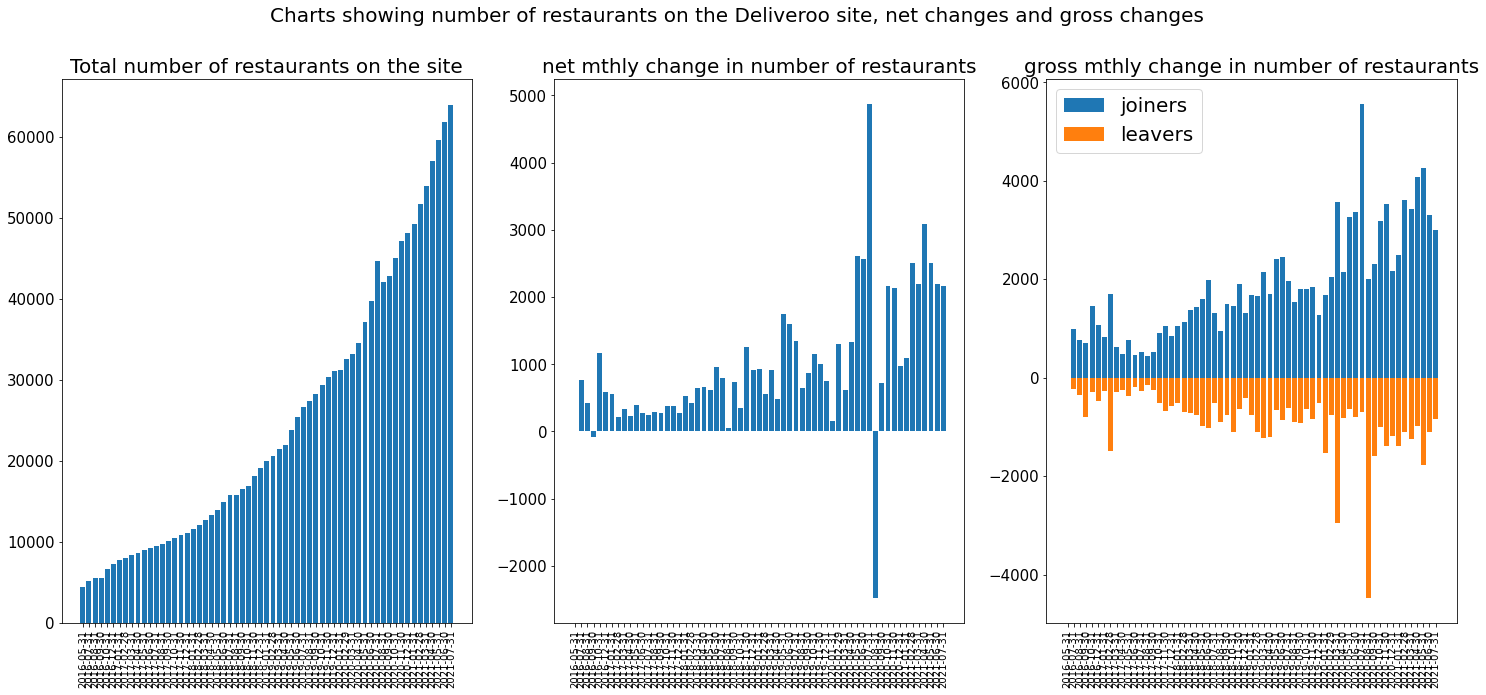

In [59]:
# 3 bar charts showing number of restaurant, net change, gross changes

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.suptitle('Charts showing number of restaurants on the Deliveroo site, net changes and gross changes', fontsize = 20)

x = df_deliverooSmry['Date']

labels = list(df_deliverooSmry['Adj Date'].astype(str).str[0:10])


y1 = df_deliverooSmry['restaurants']
ax[0].set_title('Total number of restaurants on the site', fontsize=20)
ax[0].set_xticklabels(labels, rotation = 90)
ax[0].yaxis.set_tick_params(labelsize=15)
ax[0].bar(x, y1)
#ax[0].set_ylim(bottom=26000)


y2 = df_deliverooSmry['joiners'] - df_deliverooSmry['leavers']
ax[1].set_title('net mthly change in number of restaurants', fontsize=20)
ax[1].set_xticklabels(labels, rotation = 90)
ax[1].yaxis.set_tick_params(labelsize=15)
ax[1].bar(x, y2)

y3 = df_deliverooSmry['joiners']
y4 = -df_deliverooSmry['leavers']
ax[2].set_title('gross mthly change in number of restaurants', fontsize=20)
ax[2].set_xticklabels(labels, rotation = 90)
ax[2].yaxis.set_tick_params(labelsize=15)
ax[2].bar(x, y3, label = 'joiners')
ax[2].bar(x, y4, label = 'leavers')
ax[2].legend(fontsize=20)


if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('OnlineRestaurantPortals - Deliveroo - members and changes.png', bbox_inches = 'tight')

plt.show()

In [60]:
# create the Hungry House dataframe

# create an index of dates for use in all dataframes
date = []
for i in range(len(filesHungryhouse)):
    date.append((re.search('(?<=ouse)(\d{8})', filesHungryhouse[i])).group(0)[6:8]+"/"+
(re.search('(?<=ouse)(\d{8})', filesHungryhouse[i])).group(0)[4:6]+"/"+
(re.search('(?<=ouse)(\d{8})', filesHungryhouse[i])).group(0)[0:4])
    
# remove the duplicates but keep the order
date=list(unique_everseen(date))

In [61]:
# create the start of the hungrey house dataFrame
data = {'Date': date}

df_hungryhouseSmry = pd.DataFrame(data, columns=['Date'])

In [62]:
# add in the duplicates removed column
# we will move it to the end later

df_hungryhouseSmry['removed'] = removalsHungryhouse

In [63]:
#df_hungryhouseSmry.info()
#df_hungryhouseSmry.head()
#df_hungryhouseSmry.tail()

In [64]:
# convert date into US date format and then convert to month end

df_hungryhouseSmry['US Date'] = ((df_hungryhouseSmry['Date'].astype(str).str[3:5] \
                              + "/" + df_hungryhouseSmry['Date'].astype(str).str[0:2] \
                              + "/" + df_hungryhouseSmry['Date'].astype(str).str[6:10])) 
df_hungryhouseSmry['US Date'] = pd.to_datetime(df_hungryhouseSmry['US Date'])

adjDate = []

for i in range(len(df_hungryhouseSmry['US Date'])):
    if df_hungryhouseSmry['US Date'][i] + pd.offsets.MonthEnd(0) == df_hungryhouseSmry['US Date'][i]:
        adjDate.append(df_hungryhouseSmry['US Date'][i])    
    elif abs(df_hungryhouseSmry['US Date'][i] + pd.offsets.MonthEnd(-1) - df_hungryhouseSmry['US Date'][i])\
    < abs(df_hungryhouseSmry['US Date'][i] + pd.offsets.MonthEnd(1) - df_hungryhouseSmry['US Date'][i]):
        adjDate.append(df_hungryhouseSmry['US Date'][i] + pd.offsets.MonthEnd(-1))
    else:
        adjDate.append(df_hungryhouseSmry['US Date'][i] + pd.offsets.MonthEnd(1))

df_hungryhouseSmry['Adj Date'] = adjDate

In [65]:
# add total number of restaurants

restaurants = []

for i in range(len(df_hungryhouse)):
    restaurants.append(len(df_hungryhouse[i].index))
    
df_hungryhouseSmry['restaurants'] = restaurants

In [66]:
# add leavers and joiners

joiners = [0]
leavers = [0]

for i in range(1,len(df_hungryhouse)):
    joiners.append(len(df_hungryhouse[i][~df_hungryhouse[i]['id'].isin(df_hungryhouse[i-1]['id'].values)]))
    leavers.append(len(df_hungryhouse[i-1][~df_hungryhouse[i-1]['id'].isin(df_hungryhouse[i]['id'].values)]))
    
df_hungryhouseSmry['joiners'] = joiners 
df_hungryhouseSmry['leavers'] = leavers 

In [67]:
# add rows of 0 values to match the Deliveroo range

data = {'Date': df_deliverooSmry['Date'][22:],
       'removed': 0,
       'US Date': df_deliverooSmry['US Date'][22:],
       'Adj Date': df_deliverooSmry['Adj Date'][22:],
       'restaurants': 0,
       'joiners': 0,
       'leavers': 0,}

df_hungryhouseSmry_add = pd.DataFrame(data, columns=['Date','removed','US Date','Adj Date','restaurants','joiners','leavers'])

df_hungryhouseSmry = df_hungryhouseSmry.append(df_hungryhouseSmry_add, ignore_index=True)


In [68]:
df_hungryhouseSmry.head()
#df_hungryhouseSmry

,Date,removed,US Date,Adj Date,restaurants,joiners,leavers
0,05/06/2016,7898,2016-06-05,2016-05-31,10682,0,0
1,21/07/2016,8341,2016-07-21,2016-07-31,10610,619,691
2,23/08/2016,8162,2016-08-23,2016-08-31,10611,397,396
3,23/09/2016,8162,2016-09-23,2016-09-30,10611,0,0
4,27/10/2016,1,2016-10-27,2016-10-31,10331,2090,2370


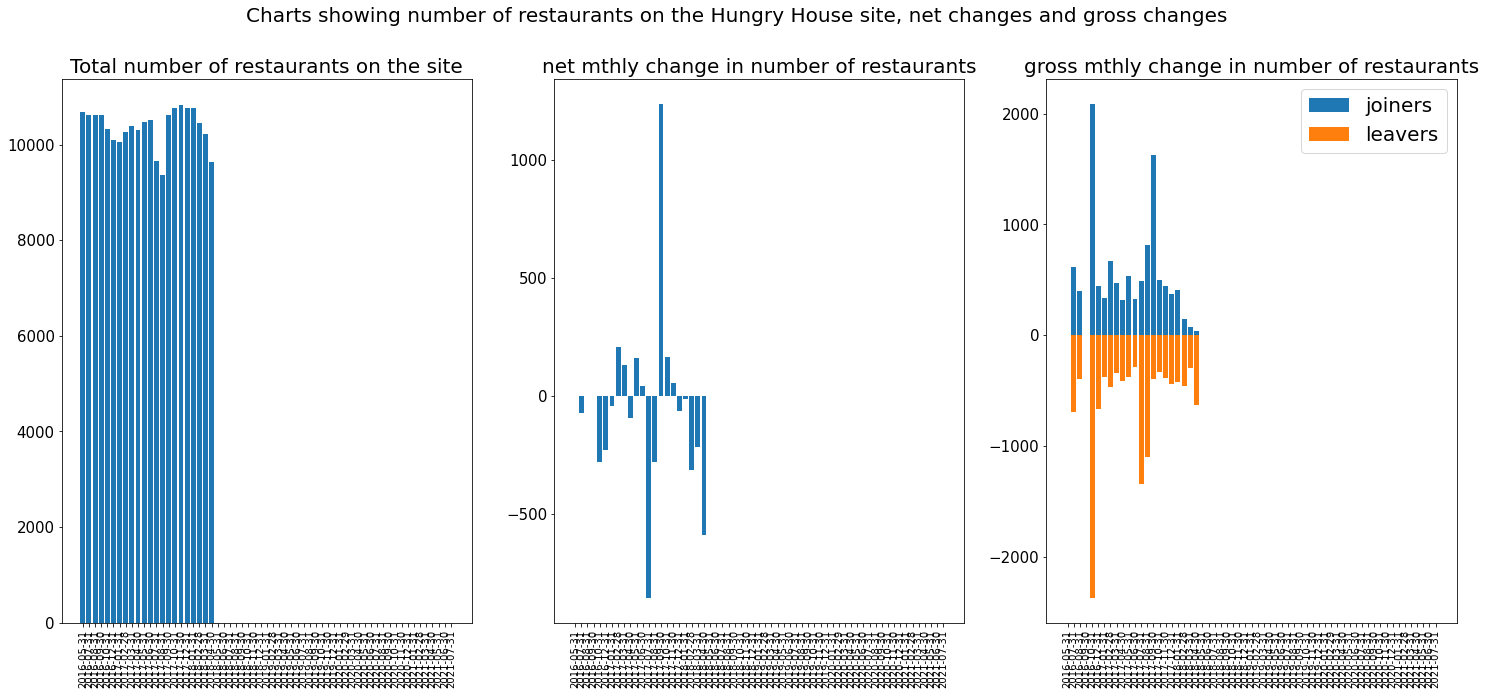

In [69]:
# 3 bar charts showing number of restaurant, net change, gross changes

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.suptitle('Charts showing number of restaurants on the Hungry House site, net changes and gross changes', fontsize = 20)

x = df_hungryhouseSmry['Date']

labels = list(df_hungryhouseSmry['Adj Date'].astype(str).str[0:10])

y1 = df_hungryhouseSmry['restaurants']
ax[0].set_title('Total number of restaurants on the site', fontsize=20)
ax[0].set_xticklabels(labels, rotation = 90)
ax[0].yaxis.set_tick_params(labelsize=15)
ax[0].bar(x, y1)
#ax[0].set_ylim(bottom=6000)


y2 = df_hungryhouseSmry['joiners'] - df_hungryhouseSmry['leavers']
ax[1].set_title('net mthly change in number of restaurants', fontsize=20)
ax[1].set_xticklabels(labels, rotation = 90)
ax[1].yaxis.set_tick_params(labelsize=15)
ax[1].bar(x, y2)

y3 = df_hungryhouseSmry['joiners']
y4 = -df_hungryhouseSmry['leavers']
ax[2].set_title('gross mthly change in number of restaurants', fontsize=20)
ax[2].set_xticklabels(labels, rotation = 90)
ax[2].yaxis.set_tick_params(labelsize=15)
ax[2].bar(x, y3, label = 'joiners')
ax[2].bar(x, y4, label = 'leavers')
ax[2].legend(fontsize=20)


if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('OnlineRestaurantPortals - Hungry House - members and changes.png', bbox_inches = 'tight')

plt.show()

In [70]:
df_hungryhouseSmry
df_hungryhouse[5].tail()

,postcode,name,address,id,adj postcode
10101,DH3 3TF,Brendas Pizzeria and Fish Bar,"17-20 North Burns, Chester-le-Street",BrendasPizzeriaandFishBarDH33TF,17-20DH33TF
10102,DH2 1DD,Indian Spice,"10 Front Street, Pelton",IndianSpiceDH21DD,10DH21DD
10103,DH3 2PG,The Red Chilli,"13 Arndale Houses, Durham Road, Birtley",TheRedChilliDH32PG,13DH32PG
10104,DH2 1DD,Istanbul Pizza House,"16 Front Street, Chester le street, Pelton",IstanbulPizzaHouseDH21DD,16DH21DD
10105,DH3 3AY,Caesar's Kitchen,"136 Front Street, Chester-le-Street",Caesar'sKitchenDH33AY,136DH33AY


In [71]:
# create the just eat dataframe

# create an index of dates for use in all dataframes
date = []
for i in range(len(filesJusteat)):
    date.append((re.search('(?<=justeat)(\d{8})', filesJusteat[i])).group(0)[6:8]+"/"+
(re.search('(?<=justeat)(\d{8})', filesJusteat[i])).group(0)[4:6]+"/"+
(re.search('(?<=justeat)(\d{8})', filesJusteat[i])).group(0)[0:4])
    
# remove the duplicates but keep the order
date=list(unique_everseen(date))

In [72]:
# create the start of the just eat dataFrame
data = {'Date': date}

df_justeatSmry = pd.DataFrame(data, columns=['Date'])

In [73]:
#df_justeatSmry.info()
#df_justeatSmry.head()
#df_justeatSmry.tail()

In [74]:
# convert date into US date format and then convert to month end

df_justeatSmry['US Date'] = ((df_justeatSmry['Date'].astype(str).str[3:5] \
                              + "/" + df_justeatSmry['Date'].astype(str).str[0:2] \
                              + "/" + df_justeatSmry['Date'].astype(str).str[6:10])) 
df_justeatSmry['US Date'] = pd.to_datetime(df_justeatSmry['US Date'])

adjDate = []

for i in range(len(df_justeatSmry['US Date'])):
    if df_justeatSmry['US Date'][i] + pd.offsets.MonthEnd(0) == df_justeatSmry['US Date'][i]:
        adjDate.append(df_justeatSmry['US Date'][i])    
    elif abs(df_justeatSmry['US Date'][i] + pd.offsets.MonthEnd(-1) - df_justeatSmry['US Date'][i])\
    < abs(df_justeatSmry['US Date'][i] + pd.offsets.MonthEnd(1) - df_justeatSmry['US Date'][i]):
        adjDate.append(df_justeatSmry['US Date'][i] + pd.offsets.MonthEnd(-1))
    else:
        adjDate.append(df_justeatSmry['US Date'][i] + pd.offsets.MonthEnd(1))

df_justeatSmry['Adj Date'] = adjDate

In [75]:
# add total number of restaurants

restaurants = []

for i in range(len(df_justeat)):
    restaurants.append(len(df_justeat[i].index))
    
df_justeatSmry['restaurants'] = restaurants

In [76]:
# add leavers and joiners

joiners = [0]
leavers = [0]

for i in range(1,len(df_justeat)):
    joiners.append(len(df_justeat[i][~df_justeat[i]['id'].isin(df_justeat[i-1]['id'].values)]))
    leavers.append(len(df_justeat[i-1][~df_justeat[i-1]['id'].isin(df_justeat[i]['id'].values)]))
    
df_justeatSmry['joiners'] = joiners 
df_justeatSmry['leavers'] = leavers 

In [77]:
df_justeatSmry.head()

,Date,US Date,Adj Date,restaurants,joiners,leavers
0,27/05/2016,2016-05-27,2016-05-31,27220,0,0
1,18/07/2016,2016-07-18,2016-07-31,27274,931,878
2,23/08/2016,2016-08-23,2016-08-31,27251,704,727
3,25/09/2016,2016-09-25,2016-09-30,27321,761,691
4,06/11/2016,2016-11-06,2016-10-31,27585,1023,759


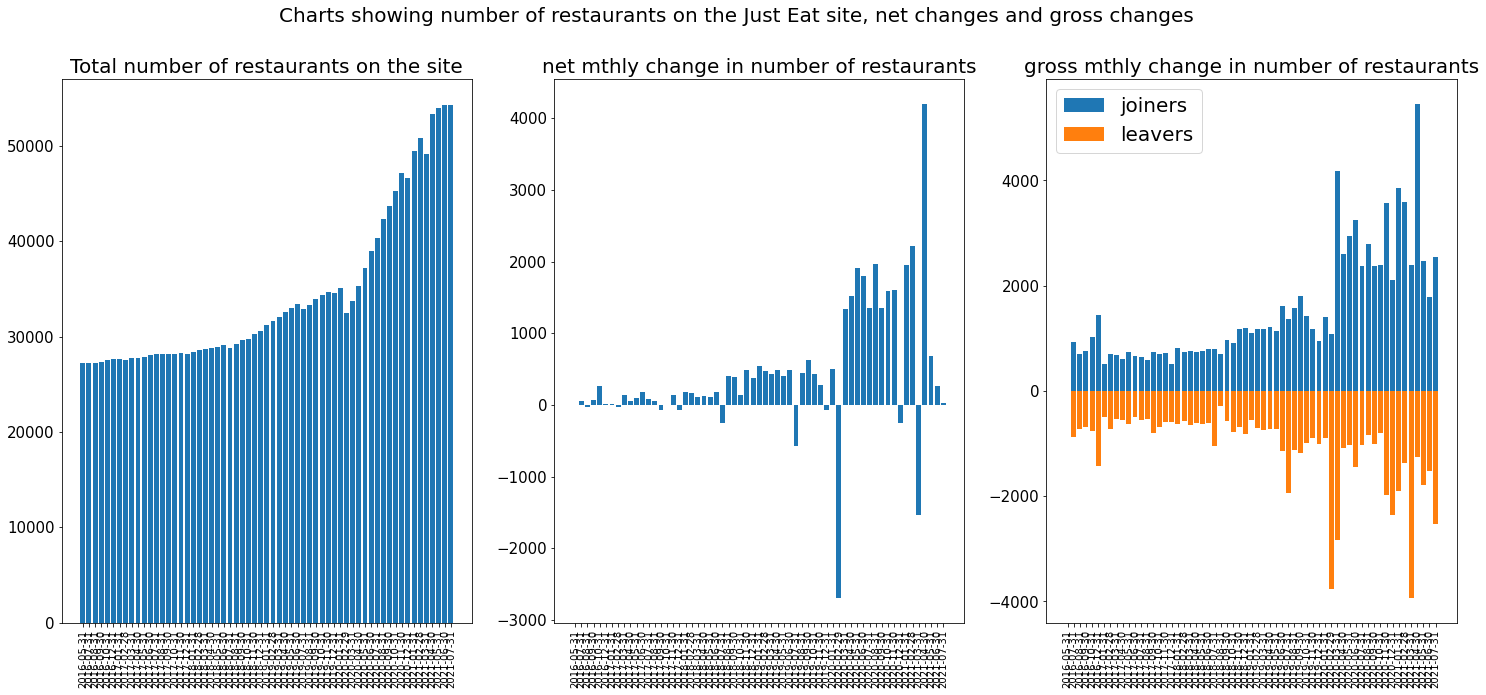

In [78]:
# 3 bar charts showing number of restaurant, net change, gross changes

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.suptitle('Charts showing number of restaurants on the Just Eat site, net changes and gross changes', fontsize = 20)

x = df_justeatSmry['Date']

labels = list(df_justeatSmry['Adj Date'].astype(str).str[0:10])

y1 = df_justeatSmry['restaurants']
ax[0].set_title('Total number of restaurants on the site', fontsize=20)
ax[0].set_xticklabels(labels, rotation = 90)
ax[0].yaxis.set_tick_params(labelsize=15)
ax[0].bar(x, y1)
#ax[0].set_ylim(bottom=26000)


y2 = df_justeatSmry['joiners'] - df_justeatSmry['leavers']
ax[1].set_title('net mthly change in number of restaurants', fontsize=20)
ax[1].set_xticklabels(labels, rotation = 90)
ax[1].yaxis.set_tick_params(labelsize=15)
ax[1].bar(x, y2)

y3 = df_justeatSmry['joiners']
y4 = -df_justeatSmry['leavers']
ax[2].set_title('gross mthly change in number of restaurants', fontsize=20)
ax[2].set_xticklabels(labels, rotation = 90)
ax[2].yaxis.set_tick_params(labelsize=15)
ax[2].bar(x, y3, label = 'joiners')
ax[2].bar(x, y4, label = 'leavers')
ax[2].legend(fontsize=20)


if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('OnlineRestaurantPortals - justeat - members and changes.png', bbox_inches = 'tight')

plt.show()

In [79]:
# test of errors of matching dates

a = set(df_justeatSmry['Adj Date'].astype(str).str[0:10])
b = set(df_deliverooSmry['Adj Date'].astype(str).str[0:10])
c = set(df_hungryhouseSmry['Adj Date'].astype(str).str[0:10])

if len(a-b) + len(b-a) + len(a-c) + len(c-a) + len(b-c) + len(c-b)> 0:
    print("******error in matching dates******")
else:
    print("all ok")


all ok


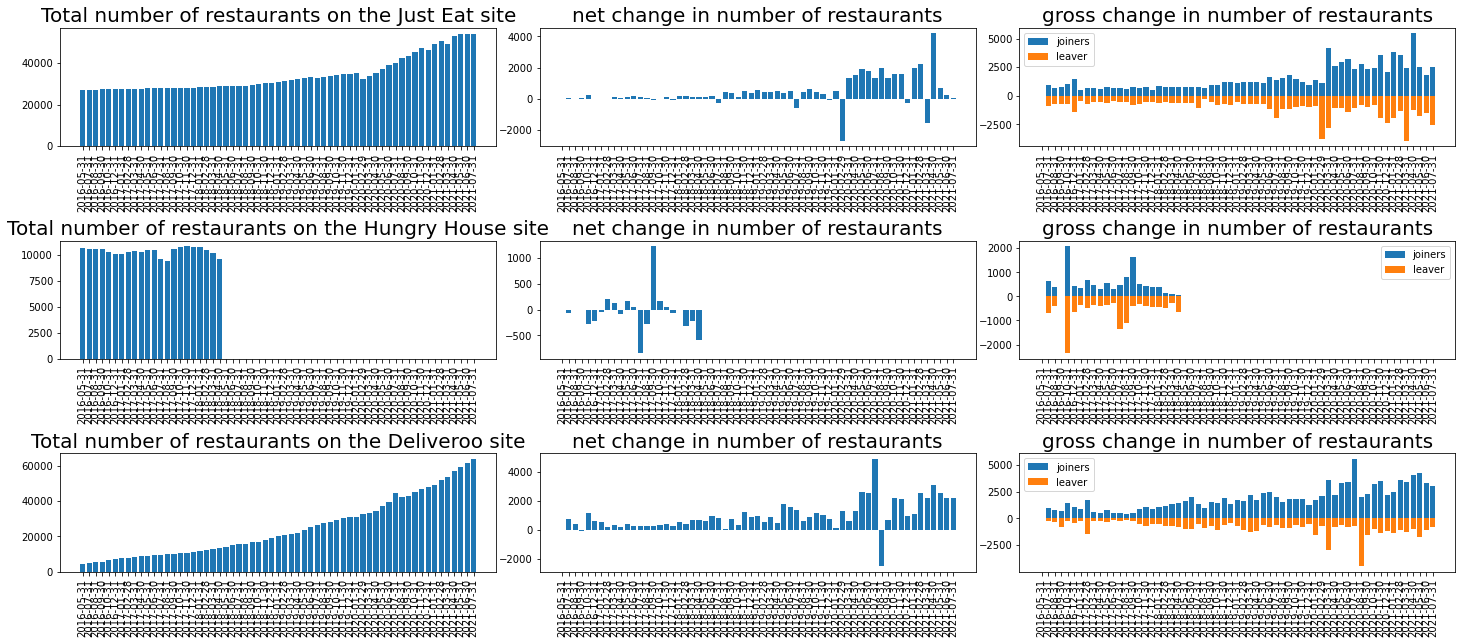

In [80]:
# 9 bar charts showing number of restaurant, net change, gross changes for Just Eat, Hungry House, Deiveroo

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25,10))

plt.subplots_adjust(hspace=0.8, wspace=0.1)
#plt.suptitle('Charts showing number of restautants on the Just Eat site, net changes and gross changes', fontsize = 20)

x = df_justeatSmry['Date']

labels = list(df_deliverooSmry['Adj Date'].astype(str).str[0:10])

y1 = df_justeatSmry['restaurants']
ax[0,0].set_title('Total number of restaurants on the Just Eat site', fontsize=20)
ax[0,0].set_xticklabels(labels, rotation = 90)
#ax[0,0].yaxis.set_tick_params(labelsize=10)
ax[0,0].bar(x, y1)
#ax[0,0].set_ylim(bottom=26000)

y2 = df_justeatSmry['joiners'] - df_justeatSmry['leavers']
ax[0,1].set_title('net change in number of restaurants', fontsize=20)
ax[0,1].set_xticklabels(labels, rotation = 90)
ax[0,1].bar(x, y2)

y3 = df_justeatSmry['joiners']
y4 = -df_justeatSmry['leavers']
ax[0,2].set_title('gross change in number of restaurants', fontsize=20)
ax[0,2].set_xticklabels(labels, rotation = 90)
ax[0,2].bar(x, y3, label = 'joiners')
ax[0,2].bar(x, y4, label = 'leaver')
ax[0,2].legend()

x = df_hungryhouseSmry['Date']

labels = list(df_deliverooSmry['Adj Date'].astype(str).str[0:10])

y5 = df_hungryhouseSmry['restaurants']
ax[1,0].set_title('Total number of restaurants on the Hungry House site', fontsize=20)
ax[1,0].set_xticklabels(labels, rotation = 90)
ax[1,0].bar(x, y5)
#ax[1,0].set_ylim(bottom=6000)


y6 = df_hungryhouseSmry['joiners'] - df_hungryhouseSmry['leavers']
ax[1,1].set_title('net change in number of restaurants', fontsize=20)
ax[1,1].set_xticklabels(labels, rotation = 90)
ax[1,1].bar(x, y6)

y7 = df_hungryhouseSmry['joiners']
y8 = -df_hungryhouseSmry['leavers']
ax[1,2].set_title('gross change in number of restaurants', fontsize=20)
ax[1,2].set_xticklabels(labels, rotation = 90)
ax[1,2].bar(x, y7, label = 'joiners')
ax[1,2].bar(x, y8, label = 'leaver')
ax[1,2].legend()

x = df_deliverooSmry['Date']

labels = list(df_deliverooSmry['Adj Date'].astype(str).str[0:10])

y9 = df_deliverooSmry['restaurants']
ax[2,0].set_title('Total number of restaurants on the Deliveroo site', fontsize=20)
ax[2,0].set_xticklabels(labels, rotation = 90)
ax[2,0].bar(x, y9)
#ax[0].set_ylim(bottom=26000)

y10 = df_deliverooSmry['joiners'] - df_deliverooSmry['leavers']
ax[2,1].set_title('net change in number of restaurants', fontsize=20)
ax[2,1].set_xticklabels(labels, rotation = 90)
ax[2,1].bar(x, y10)

y11 = df_deliverooSmry['joiners']
y12 = -df_deliverooSmry['leavers']
ax[2,2].set_title('gross change in number of restaurants', fontsize=20)
ax[2,2].set_xticklabels(labels, rotation = 90)
ax[2,2].bar(x, y11, label = 'joiners')
ax[2,2].bar(x, y12, label = 'leaver')
ax[2,2].legend()



if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('OnlineRestaurantPortals - summary charts.png', bbox_inches = 'tight')

plt.show()

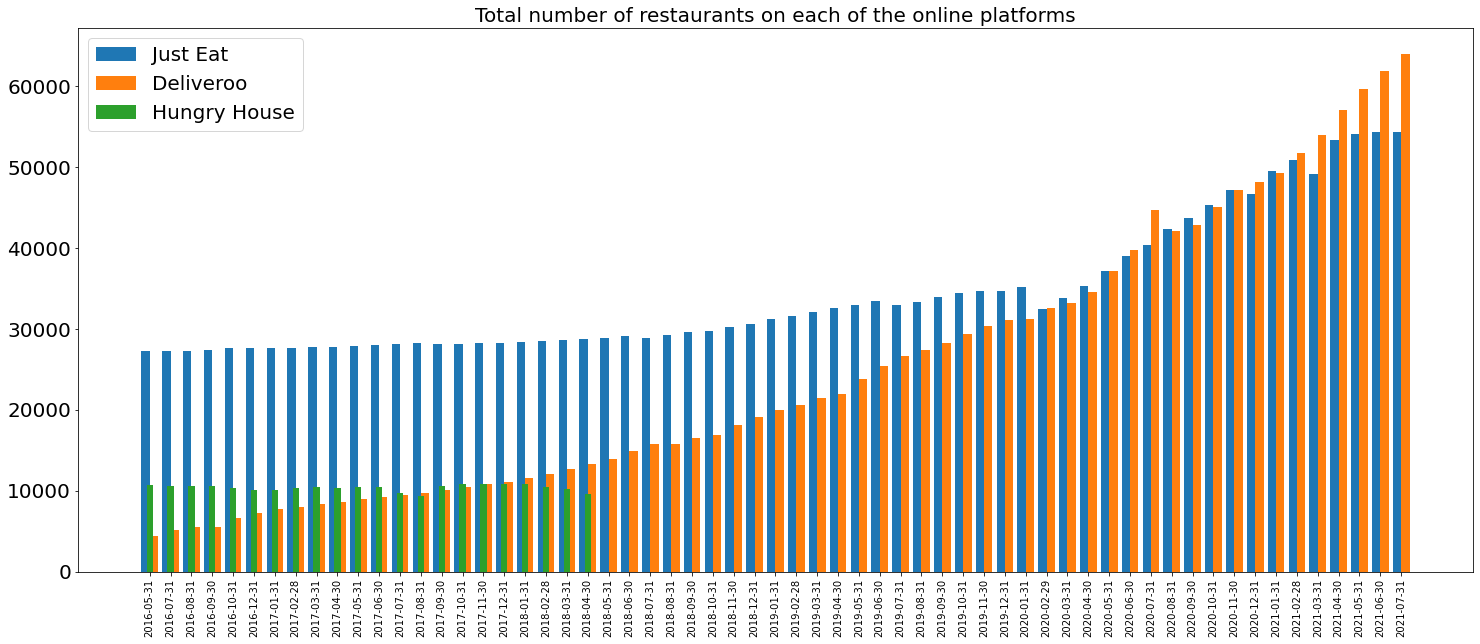

In [81]:
# 9 bar charts showing number of restaurant, net change, gross changes for Just Eat, Hungry House, Deiveroo

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.8, wspace=0.1)
#plt.suptitle('Charts showing number of restautants on the UK Platforms, net changes and gross changes', fontsize = 20)

#x = list(df_deliverooSmry.index.values)
x = df_justeatSmry['Date']

labels = list(df_deliverooSmry['Adj Date'].astype(str).str[0:10])

# df_chartdata['Just Eat'] = df_justeatSmry['restaurants']
# df_chartdata['Deliveroo'] = df_deliverooSmry['restaurants']
# df_chartdata['Hungry House'] = df_hungryhouseSmry['restaurants']

y1 = df_justeatSmry['restaurants']
y2 = df_deliverooSmry['restaurants']
y3 = df_hungryhouseSmry['restaurants']
ax.set_title('Total number of restaurants on each of the online platforms', fontsize=20)
ax.set_xticklabels(labels, rotation = 90)
ax.yaxis.set_tick_params(labelsize=20)
ax.bar(x, y1, width=-0.4, label = 'Just Eat', align = 'edge')
ax.bar(x, y2, width=0.4, label = 'Deliveroo', align = 'edge')
ax.bar(x, y3, width=0.3, label = 'Hungry House', align='center')
ax.legend(fontsize=20)

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('OnlineRestaurantPortals - comparison chart.png', bbox_inches = 'tight')

plt.show()

In [82]:
# add data on overlaps between Just Eat and Deliveroo
# we will add this to the dataframes of the uploaded data, will allow us to pull lists of restaurants later
# these will be df_justeatDeliveroo

df_justeatDeliveroo = []
overlap = []

for i in range(len(df_justeat)):
    df_justeatDeliveroo.append(df_justeat[i][df_justeat[i]['adj postcode'].isin(df_deliveroo[i]['adj postcode'].values)])
    overlap.append(len(df_justeatDeliveroo[i]))

df_justeatSmry['overlap deliveroo'] = overlap
df_deliverooSmry['overlap justeat'] = overlap

In [83]:
# add data on overlaps between Just Eat and Hungry House
# we will add this to the dataframes of the uploaded data, will allow us to pull lists of restaurants later
# these will be df_justeatHHouse

df_justeatHHouse = []
overlap = []

for i in range(len(df_hungryhouse)):
    df_justeatHHouse.append(df_justeat[i][df_justeat[i]['adj postcode'].isin(df_hungryhouse[i]['adj postcode'].values)])
    overlap.append(len(df_justeatHHouse[i]))

overlap = overlap + (len(df_justeat) - 22) * [0]

df_justeatSmry['overlap Hungry House'] = overlap
df_hungryhouseSmry['overlap justeat'] = overlap

In [84]:
#len(df_hungryhouse), len(df_justeatSmry), len(df_hungryhouseSmry),len(overlap), len(df_justeat), len(df_hungryhouse)
#overlap


In [85]:
df_justeatDeliveroo[-1].head()

,name,address,cuisine,ratingvalue,ratingcount,ratingbest,ratingworst,name_id,postcode,id,adj postcode
3,Tasty Delight CafÃ© and Desserts,"21 Greenfern Road Mastrick, Aberdeen, AB16 5PZ","Breakfast,Desserts",5.07,99,6,1,https://www.just-eat.co.uk/restaurants-tasty-d...,AB16 5PZ,TastyDelightCafÃ©andDessertsAB165PZ,21AB165PZ
5,Spiceation,"495 Great Northern Road, Aberdeen, AB24 2EE","Indian,Pakistani",5.18,723,6,1,https://www.just-eat.co.uk/restaurants-spiceat...,AB24 2EE,SpiceationAB242EE,495AB242EE
7,Jeffs Of Kingsway,"97 Kingsway, Chester, CH2 2LJ","Kebab,Pizza",5.24,705,6,1,https://www.just-eat.co.uk/restaurants-jeffs-o...,CH2 2LJ,JeffsOfKingswayCH22LJ,97CH22LJ
11,Tuscano Woodfired Pizza,"20 Whitby Road, Ellesmere Port, Chester, CH65 8AD","Italian,Pizza",4.62,2858,6,1,https://www.just-eat.co.uk/restaurants-tuscano...,CH65 8AD,TuscanoWoodfiredPizzaCH658AD,20CH658AD
12,Wok & Go - Ellesmere Port,"41 Marina Drive, Ellesmere Port, CH65 0AN","Chinese,Vegan",3.96,532,6,1,https://www.just-eat.co.uk/restaurants-wokandg...,CH65 0AN,Wok&Go-EllesmerePortCH650AN,41CH650AN


In [86]:
#
# need to check the incoming data for double entries
# code to do
#

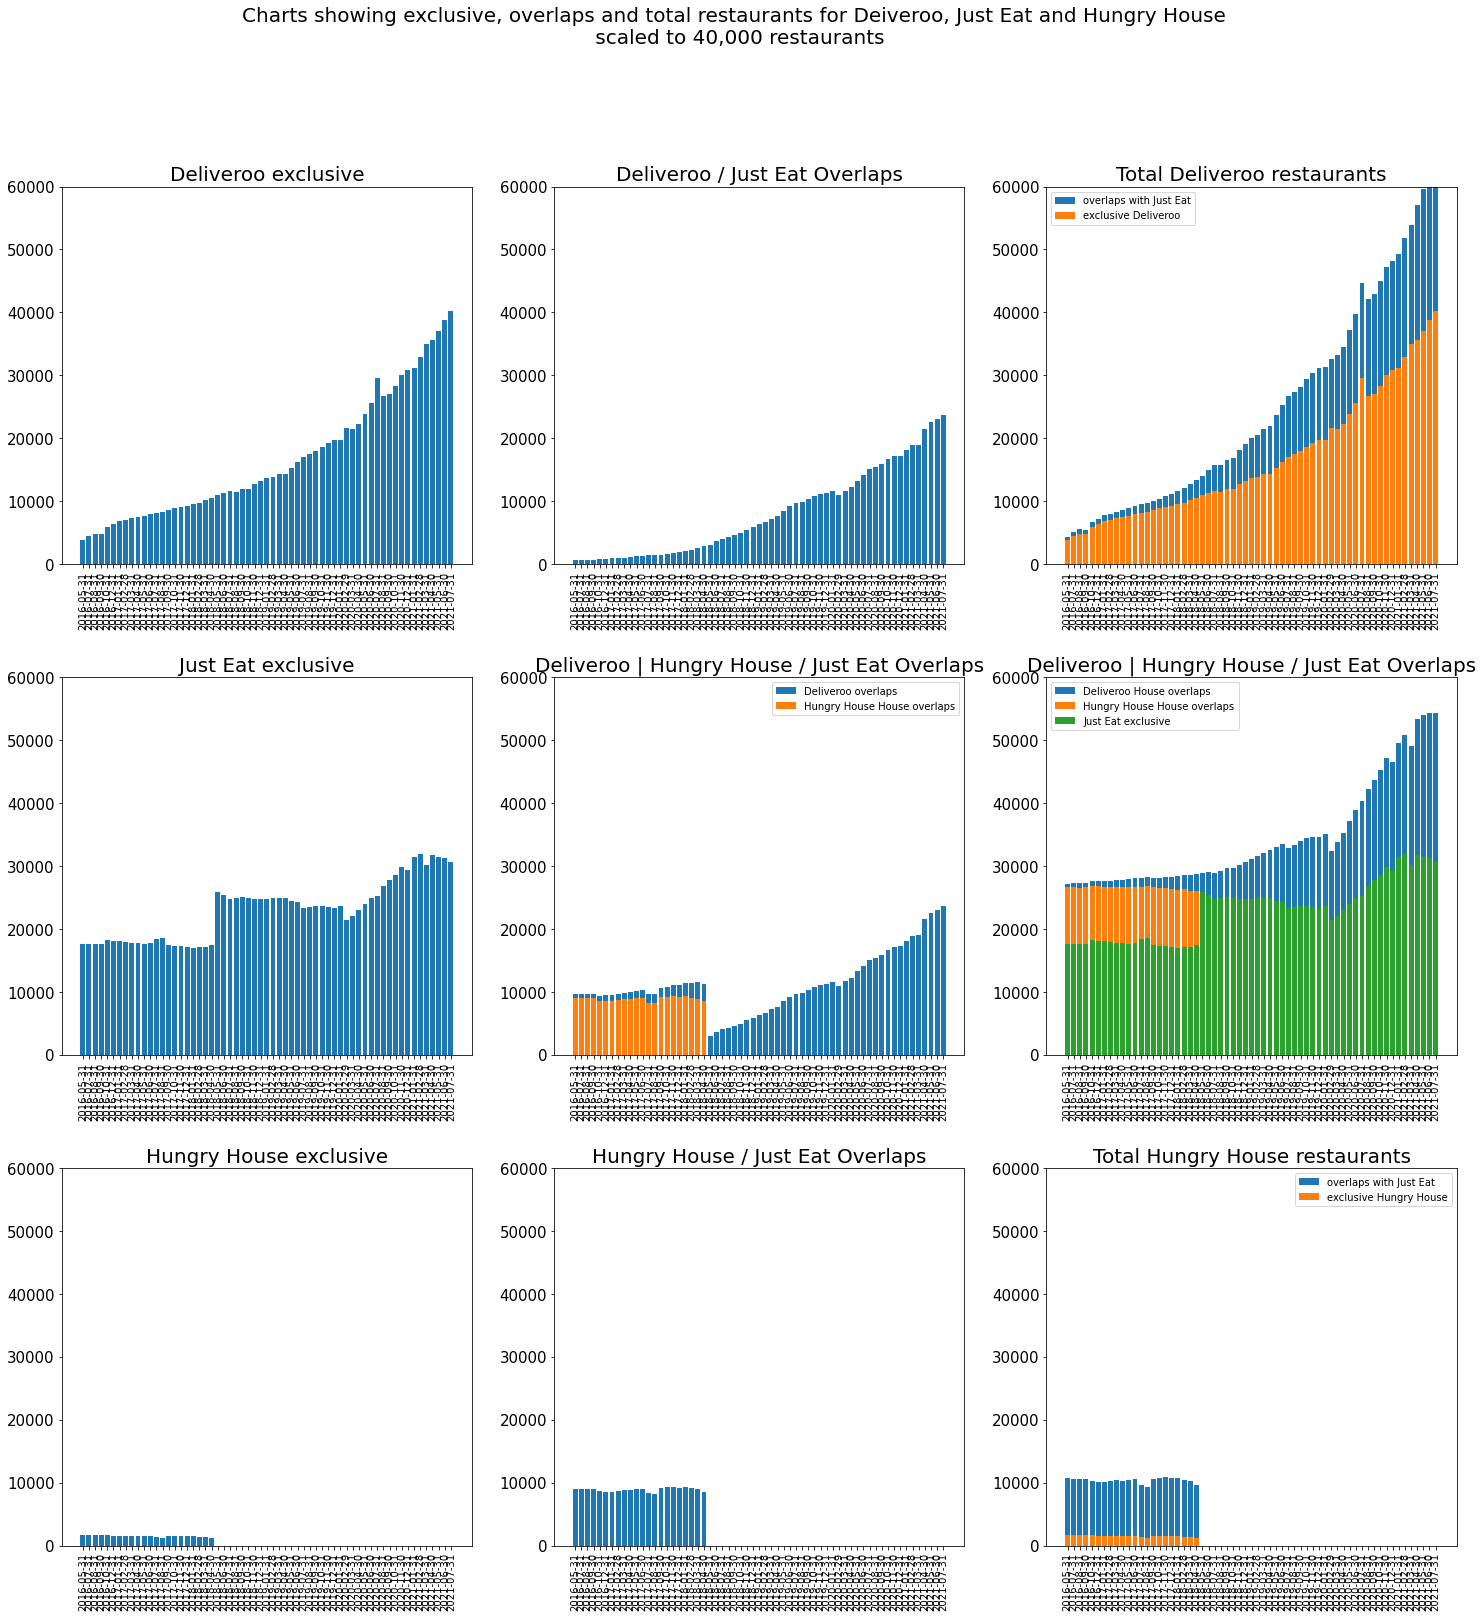

In [87]:
# 6 bar chart1 showing overlap of Just Eat and Deliveroo

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25,25))

plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.suptitle('Charts showing exclusive, overlaps and total restaurants for Deiveroo, Just Eat and Hungry House \n scaled to 40,000 restaurants', fontsize = 20)


x = df_deliverooSmry['Date']

labels = list(df_deliverooSmry['Adj Date'].astype(str).str[0:10])

top = 60000

y1 = df_deliverooSmry['restaurants'] - df_deliverooSmry['overlap justeat']
ax[0,0].set_title('Deliveroo exclusive', fontsize=20)
ax[0,0].set_xticklabels(labels, rotation = 90)
ax[0,0].yaxis.set_tick_params(labelsize=15)
ax[0,0].bar(x, y1)
ax[0,0].set_ylim(top=top)

y2 = df_deliverooSmry['overlap justeat']
ax[0,1].set_title('Deliveroo / Just Eat Overlaps', fontsize=20)
ax[0,1].set_xticklabels(labels, rotation = 90)
ax[0,1].yaxis.set_tick_params(labelsize=15)
ax[0,1].bar(x, y2)
ax[0,1].set_ylim(top=top)

y3 = df_deliverooSmry['restaurants'] - df_deliverooSmry['overlap justeat']
y4 = (df_deliverooSmry['restaurants'] - df_deliverooSmry['overlap justeat']) + df_deliverooSmry['overlap justeat']
ax[0,2].set_title('Total Deliveroo restaurants', fontsize=20)
ax[0,2].set_xticklabels(labels, rotation = 90)
ax[0,2].yaxis.set_tick_params(labelsize=15)
ax[0,2].bar(x, y4, label = 'overlaps with Just Eat')
ax[0,2].bar(x, y3, label = 'exclusive Deliveroo')
ax[0,2].set_ylim(top=top)
ax[0,2].legend()

y5 = df_justeatSmry['restaurants'] - df_justeatSmry['overlap deliveroo'] - df_justeatSmry['overlap Hungry House']
ax[1,0].set_title('Just Eat exclusive', fontsize=20)
ax[1,0].set_xticklabels(labels, rotation = 90)
ax[1,0].yaxis.set_tick_params(labelsize=15)
ax[1,0].bar(x, y5)
ax[1,0].set_ylim(top=top)

y6 = df_justeatSmry['overlap Hungry House']
y7 = df_justeatSmry['overlap deliveroo'] + df_justeatSmry['overlap Hungry House']
ax[1,1].set_title('Deliveroo | Hungry House / Just Eat Overlaps', fontsize=20)
ax[1,1].set_xticklabels(labels, rotation = 90)
ax[1,1].yaxis.set_tick_params(labelsize=15)
ax[1,1].bar(x, y7, label = 'Deliveroo overlaps')
ax[1,1].bar(x, y6, label = 'Hungry House House overlaps')
ax[1,1].set_ylim(top=top)
ax[1,1].legend()

y8 = df_justeatSmry['restaurants'] - df_justeatSmry['overlap deliveroo'] - df_justeatSmry['overlap Hungry House']
y9 = (df_justeatSmry['restaurants'] - df_justeatSmry['overlap deliveroo'] - df_justeatSmry['overlap Hungry House']) + df_justeatSmry['overlap Hungry House']
y10 = ((df_justeatSmry['restaurants'] - df_justeatSmry['overlap deliveroo'] - df_justeatSmry['overlap Hungry House']) + df_justeatSmry['overlap Hungry House']) + df_justeatSmry['overlap deliveroo']
ax[1,2].set_title('Deliveroo | Hungry House / Just Eat Overlaps', fontsize=20)
ax[1,2].set_xticklabels(labels, rotation = 90)
ax[1,2].yaxis.set_tick_params(labelsize=15)
ax[1,2].bar(x, y10, label = 'Deliveroo House overlaps')
ax[1,2].bar(x, y9, label = 'Hungry House House overlaps')
ax[1,2].bar(x, y8, label = 'Just Eat exclusive')
ax[1,2].set_ylim(top=top)
ax[1,2].legend()

y11 = df_hungryhouseSmry['restaurants'] - df_hungryhouseSmry['overlap justeat']
ax[2,0].set_title('Hungry House exclusive', fontsize=20)
ax[2,0].set_xticklabels(labels, rotation = 90)
ax[2,0].yaxis.set_tick_params(labelsize=15)
ax[2,0].bar(x, y11)
ax[2,0].set_ylim(top=top)

y12 = df_hungryhouseSmry['overlap justeat']
ax[2,1].set_title('Hungry House / Just Eat Overlaps', fontsize=20)
ax[2,1].set_xticklabels(labels, rotation = 90)
ax[2,1].yaxis.set_tick_params(labelsize=15)
ax[2,1].bar(x, y12)
ax[2,1].set_ylim(top=top)

y13 = df_hungryhouseSmry['restaurants'] - df_hungryhouseSmry['overlap justeat']
y14 = (df_hungryhouseSmry['restaurants'] - df_hungryhouseSmry['overlap justeat']) + df_hungryhouseSmry['overlap justeat']
ax[2,2].set_title('Total Hungry House restaurants', fontsize=20)
ax[2,2].set_xticklabels(labels, rotation = 90)
ax[2,2].yaxis.set_tick_params(labelsize=15)
ax[2,2].bar(x, y14, label = 'overlaps with Just Eat')
ax[2,2].bar(x, y13, label = 'exclusive Hungry House')
ax[2,2].set_ylim(top=top)
ax[2,2].legend()

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('OnlineRestaurantPortals - exclusives and overlaps.png', bbox_inches = 'tight')

plt.show()

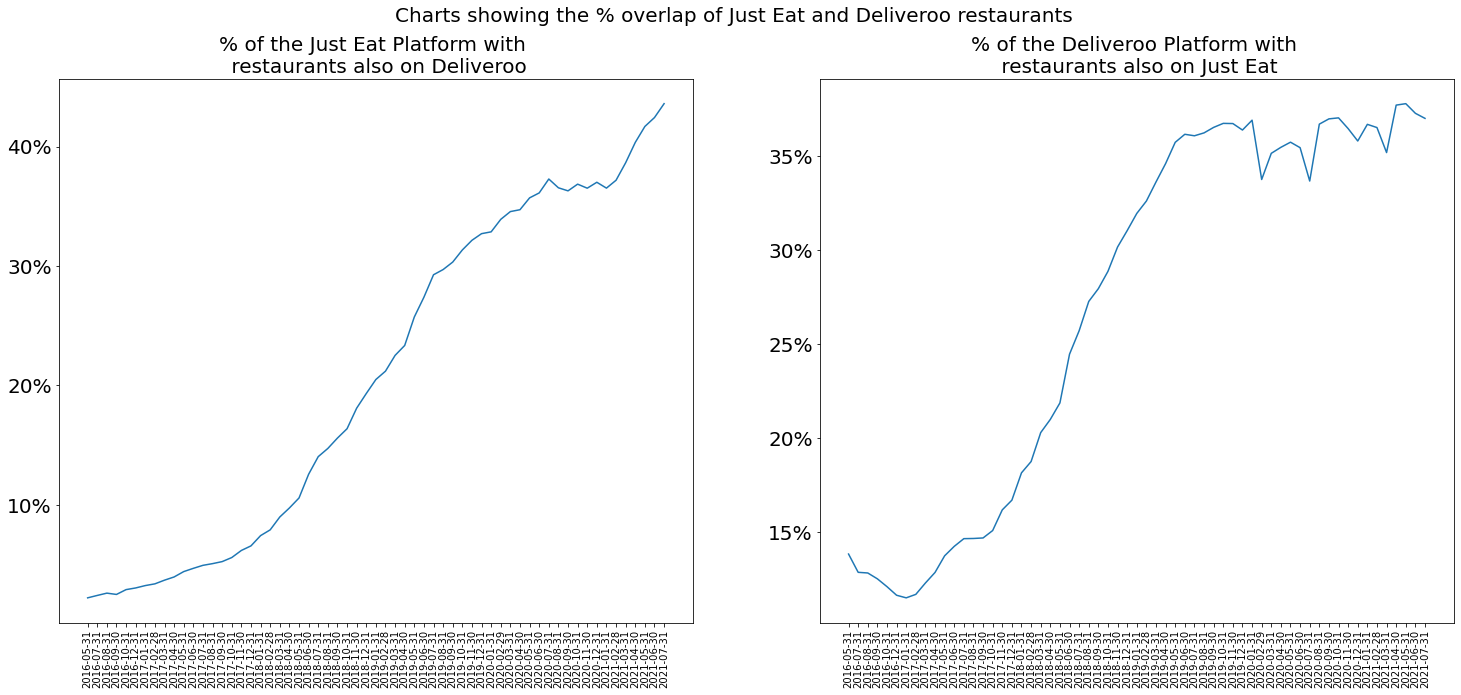

In [88]:
# 6 bar chart1 showing overlap of Just Eat and Deliveroo

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.suptitle('Charts showing the % overlap of Just Eat and Deliveroo restaurants', fontsize = 20)

x = df_deliverooSmry['Date']

labels = list(df_deliverooSmry['Adj Date'].astype(str).str[0:10])

y50 = df_justeatSmry['overlap deliveroo']/df_justeatSmry['restaurants']
ax[0].set_title('% of the Just Eat Platform with \n restaurants also on Deliveroo', fontsize=20)
ax[0].set_xticklabels(labels, rotation = 90)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax[0].plot(x, y50,)

y60 = df_deliverooSmry['overlap justeat']/df_deliverooSmry['restaurants']
ax[1].set_title('% of the Deliveroo Platform with \n restaurants also on Just Eat', fontsize=20)
ax[1].set_xticklabels(labels, rotation = 90)
ax[1].yaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax[1].plot(x, y60)


if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('OnlineRestaurantPortals - exclusives and overlaps pct.png', bbox_inches = 'tight')

plt.show()

In [89]:
df_justeatSmry.head()

,Date,US Date,Adj Date,restaurants,joiners,leavers,overlap deliveroo,overlap Hungry House
0,27/05/2016,2016-05-27,2016-05-31,27220,0,0,603,9006
1,18/07/2016,2016-07-18,2016-07-31,27274,931,878,659,8961
2,23/08/2016,2016-08-23,2016-08-31,27251,704,727,711,8969
3,25/09/2016,2016-09-25,2016-09-30,27321,761,691,683,8969
4,06/11/2016,2016-11-06,2016-10-31,27585,1023,759,801,8605


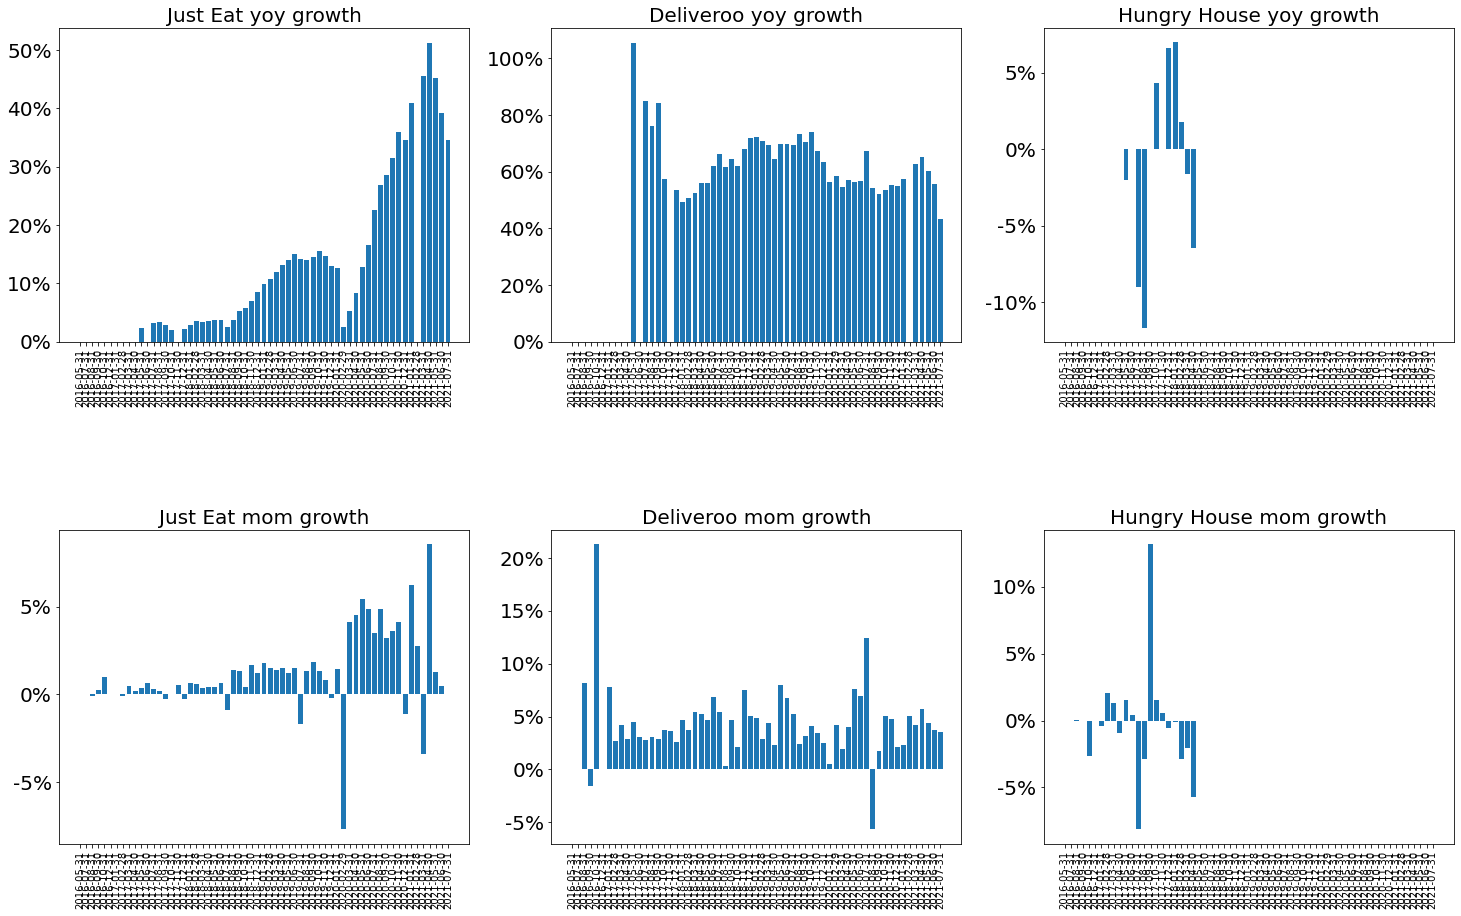

In [90]:
# 6 bar chart1 showing yoy and mom growth

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,15))

plt.subplots_adjust(hspace=0.6, wspace=0.2)
#plt.suptitle('Charts showing exclusive, overlaps and total restaurants for Deiveroo, Just Eat and Hungry House \n scaled to 40,000 restaurants', fontsize = 20)


x = df_deliverooSmry['Date']

labels = list(df_deliverooSmry['Adj Date'].astype(str).str[0:10])

yoyGrowth = [0,0,0,0,0,0,0,0,0,0]
for i in range(len(df_justeatSmry)-10):
    try:
        yoyGrowth.append((df_justeatSmry['restaurants'][i+10])/\
              (df_justeatSmry[df_justeatSmry['Adj Date'] == df_justeatSmry['Adj Date'][i+10]\
                              - pd.DateOffset(years=1)]['restaurants'].values[0]) -1)
    except:
        yoyGrowth.append(0)

y1 = yoyGrowth
ax[0,0].set_title('Just Eat yoy growth', fontsize=20)
ax[0,0].set_xticklabels(labels, rotation = 90)
ax[0,0].yaxis.set_tick_params(labelsize=20)
ax[0,0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax[0,0].bar(x, y1)


yoyGrowth = [0,0,0,0,0,0,0,0,0,0]
for i in range(len(df_justeatSmry)-10):
    try:
        yoyGrowth.append((df_deliverooSmry['restaurants'][i+10])/\
              (df_deliverooSmry[df_deliverooSmry['Adj Date'] == df_deliverooSmry['Adj Date'][i+10]\
                              - pd.DateOffset(years=1)]['restaurants'].values[0]) -1)
    except:
        yoyGrowth.append(0)

y2 = yoyGrowth
ax[0,1].set_title('Deliveroo yoy growth', fontsize=20)
ax[0,1].set_xticklabels(labels, rotation = 90)
ax[0,1].yaxis.set_tick_params(labelsize=20)
ax[0,1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax[0,1].bar(x, y2)        
    

yoyGrowth = [0,0,0,0,0,0,0,0,0,0]
for i in range(len(df_hungryhouseSmry)-10):
    if df_hungryhouseSmry['restaurants'][i+10] == 0:
        yoyGrowth.append(0)
    else:
        try:
            yoyGrowth.append((df_hungryhouseSmry['restaurants'][i+10])/\
                  (df_hungryhouseSmry[df_hungryhouseSmry['Adj Date'] == df_hungryhouseSmry['Adj Date'][i+10]\
                                  - pd.DateOffset(years=1)]['restaurants'].values[0]) -1)
        except:
            yoyGrowth.append(0)

y3 = yoyGrowth
ax[0,2].set_title('Hungry House yoy growth', fontsize=20)
ax[0,2].set_xticklabels(labels, rotation = 90)
ax[0,2].yaxis.set_tick_params(labelsize=20)
ax[0,2].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax[0,2].bar(x, y3)  
    
    
x = df_deliverooSmry['Date']

labels = list(df_deliverooSmry['Adj Date'].astype(str).str[0:10])

momGrowth = [0]
for i in range(len(df_justeatSmry)-1):
    try:
        momGrowth.append((df_justeatSmry['restaurants'][i+1])/\
              (df_justeatSmry[df_justeatSmry['Adj Date'] == df_justeatSmry['Adj Date'][i+1]\
                              - pd.offsets.MonthEnd(1)]['restaurants'].values[0]) -1)
    except:
        momGrowth.append(0)
        
y4= momGrowth
ax[1,0].set_title('Just Eat mom growth', fontsize=20)
ax[1,0].set_xticklabels(labels, rotation = 90)
ax[1,0].yaxis.set_tick_params(labelsize=20)
ax[1,0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax[1,0].bar(x, y4)    


momGrowth = [0]
for i in range(len(df_justeatSmry)-1):
    try:
        momGrowth.append((df_deliverooSmry['restaurants'][i+1])/\
              (df_deliverooSmry[df_deliverooSmry['Adj Date'] == df_deliverooSmry['Adj Date'][i+1]\
                              - pd.offsets.MonthEnd(1)]['restaurants'].values[0]) -1)
    except:
        momGrowth.append(0)

y5= momGrowth
ax[1,1].set_title('Deliveroo mom growth', fontsize=20)
ax[1,1].set_xticklabels(labels, rotation = 90)
ax[1,1].yaxis.set_tick_params(labelsize=20)
ax[1,1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax[1,1].bar(x, y5)


momGrowth = [0]
for i in range(len(df_hungryhouseSmry)-1):
    if df_hungryhouseSmry['restaurants'][i+1] == 0:
        momGrowth.append(0)
    else:
        try:
            momGrowth.append((df_hungryhouseSmry['restaurants'][i+1])/\
                  (df_hungryhouseSmry[df_hungryhouseSmry['Adj Date'] == df_hungryhouseSmry['Adj Date'][i+1]\
                                  - pd.offsets.MonthEnd(1)]['restaurants'].values[0]) -1)
        except:
            momGrowth.append(0)

y6= momGrowth
ax[1,2].set_title('Hungry House mom growth', fontsize=20)
ax[1,2].set_xticklabels(labels, rotation = 90)
ax[1,2].yaxis.set_tick_params(labelsize=20)
ax[1,2].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax[1,2].bar(x, y6)


if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('OnlineRestaurantPortals - growth rates.png', bbox_inches = 'tight')

plt.show()

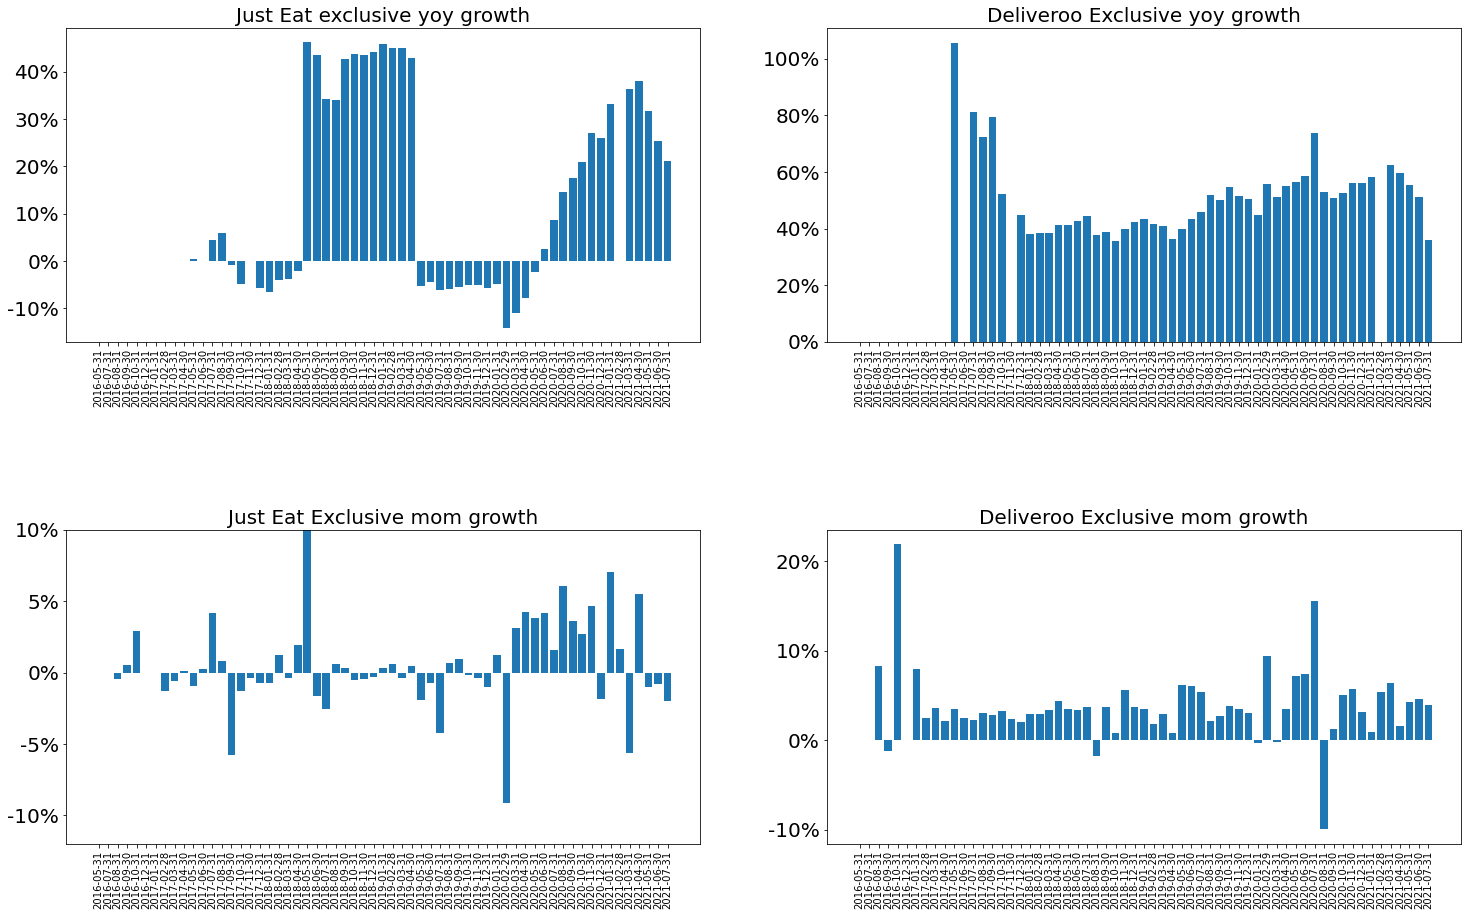

In [91]:
# 4 bar chart1 showing yoy and mom growth

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,15))

plt.subplots_adjust(hspace=0.6, wspace=0.2)
#plt.suptitle('Charts showing exclusive, overlaps and total restaurants for Deiveroo, Just Eat and Hungry House \n scaled to 40,000 restaurants', fontsize = 20)


x = df_deliverooSmry['Date']

labels = list(df_deliverooSmry['Adj Date'].astype(str).str[0:10])

yoyGrowth = [0,0,0,0,0,0,0,0,0,0]
for i in range(len(df_justeatSmry)-10):
    try:
        yoyGrowth.append(((df_justeatSmry['restaurants'][i+10]\
                           - df_justeatSmry['overlap deliveroo'][i+10]\
                           - df_justeatSmry['overlap Hungry House'][i+10])\
 /(df_justeatSmry[df_justeatSmry['Adj Date'] == df_justeatSmry['Adj Date'][i+10]\
                  - pd.DateOffset(years=1)]['restaurants'].values[0]\
  - df_justeatSmry[df_justeatSmry['Adj Date'] == df_justeatSmry['Adj Date'][i+10]\
                   - pd.DateOffset(years=1)]['overlap deliveroo'].values[0]\
 - df_justeatSmry[df_justeatSmry['Adj Date'] == df_justeatSmry['Adj Date'][i+10]\
                  - pd.DateOffset(years=1)]['overlap Hungry House'].values[0]) -1))
    except:
        yoyGrowth.append(0)

y1 = yoyGrowth
ax[0,0].set_title('Just Eat exclusive yoy growth', fontsize=20)
ax[0,0].set_xticklabels(labels, rotation = 90)
ax[0,0].yaxis.set_tick_params(labelsize=20)
ax[0,0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax[0,0].bar(x, y1)


yoyGrowth = [0,0,0,0,0,0,0,0,0,0]
for i in range(len(df_justeatSmry)-10):
    try:
        yoyGrowth.append(((df_deliverooSmry['restaurants'][i+10]\
                           - df_justeatSmry['overlap deliveroo'][i+10])\
 /(df_deliverooSmry[df_deliverooSmry['Adj Date'] == df_deliverooSmry['Adj Date'][i+10]\
                    - pd.DateOffset(years=1)]['restaurants'].values[0]\
  - df_deliverooSmry[df_deliverooSmry['Adj Date'] == df_deliverooSmry['Adj Date'][i+10]\
                     - pd.DateOffset(years=1)]['overlap justeat'].values[0]) -1))
    except:
        yoyGrowth.append(0)

y2 = yoyGrowth
ax[0,1].set_title('Deliveroo Exclusive yoy growth', fontsize=20)
ax[0,1].set_xticklabels(labels, rotation = 90)
ax[0,1].yaxis.set_tick_params(labelsize=20)
ax[0,1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax[0,1].bar(x, y2)        
    
    
x = df_deliverooSmry['Date']

labels = list(df_deliverooSmry['Adj Date'].astype(str).str[0:10])

momGrowth = [0]
for i in range(len(df_justeatSmry)-1):
    try:
        momGrowth.append((df_justeatSmry['restaurants'][i+1]\
                          - df_justeatSmry['overlap deliveroo'][i+1]\
                          - df_justeatSmry['overlap Hungry House'][i+1])/\
              (df_justeatSmry[df_justeatSmry['Adj Date'] == df_justeatSmry['Adj Date'][i+1]\
                              - pd.offsets.MonthEnd(1)]['restaurants'].values[0]\
              - df_justeatSmry[df_justeatSmry['Adj Date'] == df_justeatSmry['Adj Date'][i+1]\
                              - pd.offsets.MonthEnd(1)]['overlap deliveroo'].values[0]
              - df_justeatSmry[df_justeatSmry['Adj Date'] == df_justeatSmry['Adj Date'][i+1]\
                              - pd.offsets.MonthEnd(1)]['overlap Hungry House'].values[0]) -1)
    except:
        momGrowth.append(0)
        
y4= momGrowth
ax[1,0].set_title('Just Eat Exclusive mom growth', fontsize=20)
ax[1,0].set_xticklabels(labels, rotation = 90)
ax[1,0].yaxis.set_tick_params(labelsize=20)
ax[1,0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax[1,0].bar(x, y4)    
ax[1,0].set_ylim(top=0.1)

momGrowth = [0]
for i in range(len(df_justeatSmry)-1):
    try:
        momGrowth.append((df_deliverooSmry['restaurants'][i+1]\
                          - df_deliverooSmry['overlap justeat'][i+1])/\
              (df_deliverooSmry[df_deliverooSmry['Adj Date'] == df_deliverooSmry['Adj Date'][i+1]\
                              - pd.offsets.MonthEnd(1)]['restaurants'].values[0]\
              - df_deliverooSmry[df_deliverooSmry['Adj Date'] == df_deliverooSmry['Adj Date'][i+1]\
                              - pd.offsets.MonthEnd(1)]['overlap justeat'].values[0]) -1)
    except:
        momGrowth.append(0)

y5= momGrowth
ax[1,1].set_title('Deliveroo Exclusive mom growth', fontsize=20)
ax[1,1].set_xticklabels(labels, rotation = 90)
ax[1,1].yaxis.set_tick_params(labelsize=20)
ax[1,1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax[1,1].bar(x, y5)


if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('OnlineRestaurantPortals -  exclusive growth rates.png', bbox_inches = 'tight')

plt.show()

In [92]:
# we have the main participants of the UK online restaurant market and so we can determine the size and growth
# missing ubereats and dominos pizza

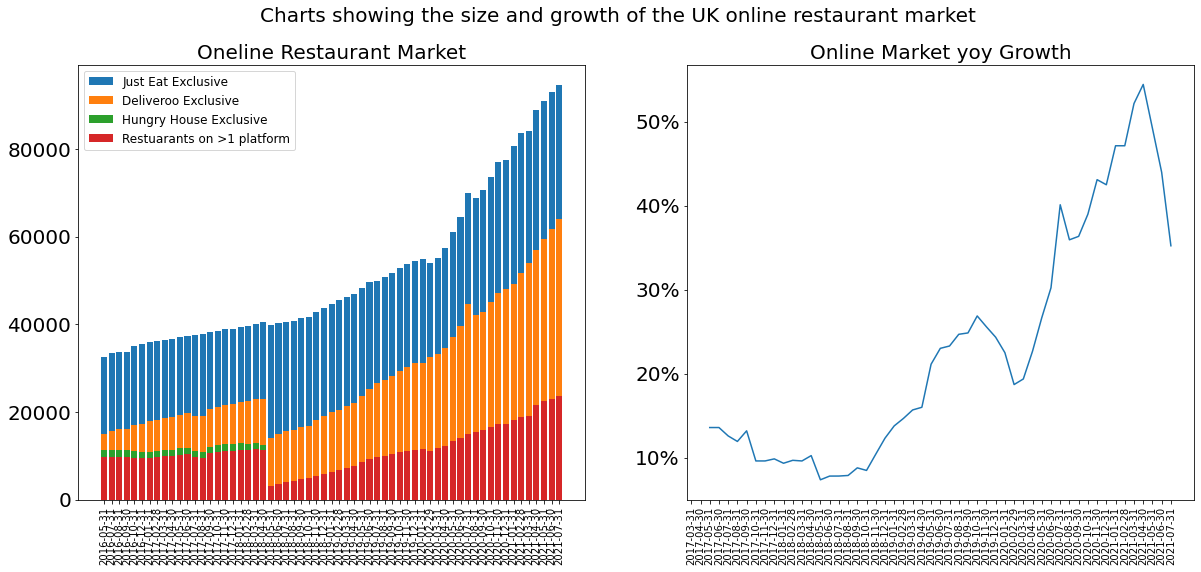

In [93]:
# 2 charts showing the online restaurant market

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.suptitle('Charts showing the size and growth of the UK online restaurant market', fontsize = 20)


x = df_deliverooSmry['Date']

labels = list(df_deliverooSmry['Adj Date'].astype(str).str[0:10])

y1 = df_justeatSmry['restaurants'] - df_justeatSmry['overlap deliveroo'] - df_justeatSmry['overlap Hungry House']\
+df_deliverooSmry['restaurants'] - df_deliverooSmry['overlap justeat']\
+df_hungryhouseSmry['restaurants'] - df_hungryhouseSmry['overlap justeat']\
+ df_justeatSmry['overlap deliveroo'] + df_justeatSmry['overlap Hungry House']
y2 = df_deliverooSmry['restaurants'] - df_deliverooSmry['overlap justeat']\
+df_hungryhouseSmry['restaurants'] - df_hungryhouseSmry['overlap justeat']\
+ df_justeatSmry['overlap deliveroo'] + df_justeatSmry['overlap Hungry House']
y3 = df_hungryhouseSmry['restaurants'] - df_hungryhouseSmry['overlap justeat']\
+ df_justeatSmry['overlap deliveroo'] + df_justeatSmry['overlap Hungry House']
y4 = df_justeatSmry['overlap deliveroo'] + df_justeatSmry['overlap Hungry House']
ax[0].set_title('Oneline Restaurant Market', fontsize=20)
ax[0].set_xticklabels(labels, rotation = 90)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[0].bar(x, y1, label = 'Just Eat Exclusive')
ax[0].bar(x, y2, label = 'Deliveroo Exclusive')
ax[0].bar(x, y3, label = 'Hungry House Exclusive')
ax[0].bar(x, y4, label = 'Restuarants on >1 platform')
ax[0].legend(fontsize = 12)

df_justeatSmry['Online Market'] = df_justeatSmry['restaurants']\
+ df_deliverooSmry['restaurants']\
- df_justeatSmry['overlap deliveroo']\
+ df_hungryhouseSmry['restaurants']\
 - df_justeatSmry['overlap Hungry House']

#yoyGrowth = [0,0,0,0,0,0,0,0,0,0]
yoyGrowth = [float('nan'),float('nan'),float('nan'),float('nan'),float('nan'),float('nan'),float('nan'),float('nan'),float('nan'),float('nan')]
for i in range(len(df_justeatSmry)-10):
    try:
        yoyGrowth.append(((df_justeatSmry['Online Market'][i+10])\
 /(df_justeatSmry[df_justeatSmry['Adj Date'] == df_justeatSmry['Adj Date'][i+10]\
                  - pd.DateOffset(years=1)]['Online Market'].values[0]) -1))
    except:
        yoyGrowth.append(yoyGrowth[i+9])
        
y50 = yoyGrowth
ax[1].set_title('Online Market yoy Growth', fontsize=20)
ax[1].set_xticklabels(labels, rotation = 90)
ax[1].yaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax[1].plot(x, y50)


if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('OnlineRestaurantPortals -  online market size and growth.png', bbox_inches = 'tight')

plt.show()

In [94]:
# looking at how many Hungry House restaurants are still with Just Eat

In [95]:
# df_hungryhouse[21] is the last Hungry House upload
# this is the same as df_justeat[21]
# so lets take all the overlaps between df_hungryhouse[21] and df_justeat[22] and see how many are still in df_justeat[-1]

df_hungryHouseTakeover = (df_justeat[22][df_justeat[22]['adj postcode'].isin(df_hungryhouse[21]['adj postcode'].values)])

df_hungryHouseTakeover.shape

(8530, 5)

In [96]:
#df_justeat[-1][df_justeat[-1]['id'].isin(df_hungryHouseTakeover['id'].values)]['name'].count()

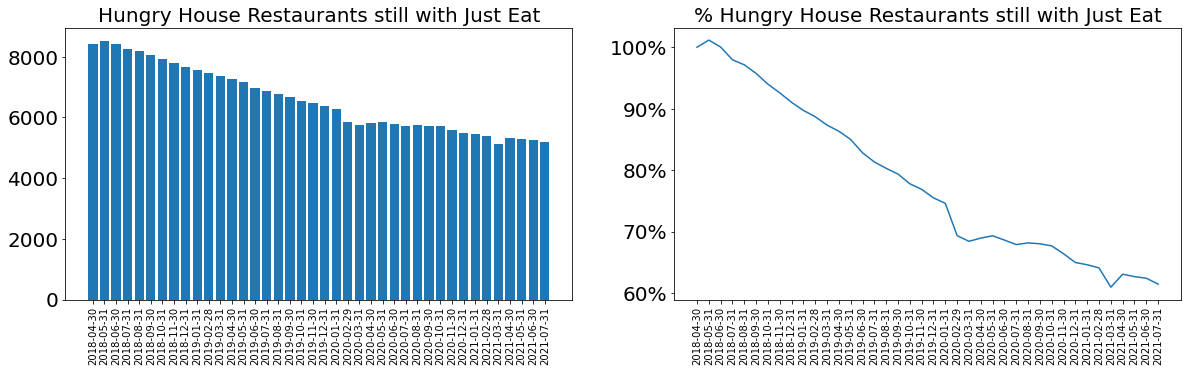

In [97]:
# 2 chart show the Hungry House restaurants still with Just Eat

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

plt.subplots_adjust(hspace=0.3, wspace=0.2)
#plt.suptitle('Charts showing the size and growth of the UK online restaurant market', fontsize = 20)


x = df_justeatSmry['Date'][21:]

labels = list(df_justeatSmry['Adj Date'][21:].astype(str).str[0:10])

HungryHouseRemain = []
for i in range(len(df_justeat)-21):
    HungryHouseRemain.append(df_justeat[i+21][df_justeat[i+21]['id'].isin(df_hungryHouseTakeover['id'].values)]['name'].count())

y1=HungryHouseRemain
ax[0].set_title('Hungry House Restaurants still with Just Eat', fontsize=20)
ax[0].set_xticklabels(labels, rotation = 90)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[0].bar(x, y1)

y2=HungryHouseRemain/df_justeat[21][df_justeat[21]['id'].isin(df_hungryHouseTakeover['id'].values)]['name'].count()
ax[1].set_title('% Hungry House Restaurants still with Just Eat', fontsize=20)
ax[1].set_xticklabels(labels, rotation = 90)
ax[1].yaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax[1].plot(x, y2)


if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('OnlineRestaurantPortals -  Hungry House Restaurants still with Just Eat.png', bbox_inches = 'tight')

plt.show()

In [98]:
# Powerpoint Presentation creation

In [99]:
if PwrptPrep == 1:
    prs = Presentation('Persentation - template.pptx')

In [100]:
# list of slide titles, text and images to add

if PwrptPrep == 1:
    presentationTitle = ['Online Restaurant Portals monthly data visualisation', 'Andrew Neville', 'February 2021']

    slideTitle = ['Number of restaurants on Deliveroo and the monthly changes',
'Number of restaurants on Hungry House and the monthly changes',
'Number of restaurants on Just Eat and the monthly changes',
'Number of restaurants on each platform and the monthly changes',
'Comparison of number of restaurants on each platform',
'Analysis exclusive and overlapping restaurants on each platform',
'% of Just Eat restaurants also on Deliveroo, and the other way round',
'Year-on-Year and month-on-month growth on each platform',
'Year-on-Year and month-on-month growth of exclusive and all Restaurants on Just Eat and Deliveroo',
'Online restaurant market size and year-on-year growth',
'Hungryhouse overlapping restaurants still with Just Eat post acquisition',
                     ]

    slideText = ['May 2016 to February 2021, monthly',
'May 2016 to February 2021, monthly',
'May 2016 to February 2021, monthly',
'May 2016 to February 2021, monthly',
'May 2016 to February 2021, monthly',
'May 2016 to February 2021, monthly',
'May 2016 to February 2021, monthly',
'May 2016 to February 2021, monthly',
'May 2016 to February 2021, monthly',
'May 2016 to February 2021, monthly',
'May 2016 to February 2021, monthly',
                    ]

    imagePath = ['OnlineRestaurantPortals - Deliveroo - members and changes.png',
'OnlineRestaurantPortals - Hungry House - members and changes.png',
'OnlineRestaurantPortals - justeat - members and changes.png',
'OnlineRestaurantPortals - summary charts.png',
'OnlineRestaurantPortals - comparison chart.png',
'OnlineRestaurantPortals - exclusives and overlaps.png',
'OnlineRestaurantPortals - exclusives and overlaps pct.png',
'OnlineRestaurantPortals - growth rates.png',
'OnlineRestaurantPortals -  exclusive growth rates.png',
'OnlineRestaurantPortals -  online market size and growth.png',
'OnlineRestaurantPortals -  Hungry House Restaurants still with Just Eat.png',
                    ]

    saveFileName = 'presentationPrep - OnlineRestaurants.pptx'

In [101]:
# change the title and date on the front page
# the slide shapes do not go nicely 0,1,2 they go 1,2,0
if PwrptPrep == 1:
    
    listShapes = [1,2,0]

    for i in range(3):
        slide = prs.slides[0]
        shape = slide.shapes[listShapes[i]]
        text_frame = shape.text_frame
        text_frame.paragraphs[0].runs[0].text = presentationTitle[i]

In [102]:
# add the Preamble and Summary slides
if PwrptPrep == 1:
    
    title_Preamble_Summary = ['Preamble', 'Summary']

    for i in range(2):
        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = title_Preamble_Summary[i]

        top = height = Inches(1.5)
        width = Inches(10.25)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        p = tf.add_paragraph()
        p.level = 1
        p.text = 'start writing here'

In [103]:
# add the Chapter contents slide and Chapter 1 slide
if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'Contents'

    rows = cols = 2
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(1.5)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    table.columns[0].width = Inches(1.5)
    table.columns[1].width = Inches(2.0)

    tableText = ['01', 'Charts', '02', 'Appendix']
    TableFont = [60, 14, 60, 14]
    tableCell1 = [0,0,1,1]
    tableCell2 = [0,1,0,1]

    for i in range(4):
        table.cell(tableCell1[i], tableCell2[i]).text = tableText[i]
        cell = table.cell(tableCell1[i], tableCell2[i])
        para = cell.text_frame.paragraphs[0]
        para.font.bold = True
        para.font.size = Pt(TableFont[i])
        para.font.color.rgb = RGBColor(0, 55, 129) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()

    slide = prs.slides.add_slide(prs.slide_layouts[9])
    placeholder = slide.placeholders[1]
    placeholder.text = '01'
    title = slide.shapes.title
    title.text = 'Charts'


In [104]:
# add a blank slide with title, text and saved graphic as per the list of items
if PwrptPrep == 1:
    
    for i in range(len(slideTitle)):

        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = slideTitle[i]

        top = width = height = Inches(1.5)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame

        p = tf.add_paragraph()
        p.text = slideText[i]
        p.font.bold = True
        p.font.size = Pt(14)

        left = Inches(0.25)
        top = Inches(2.5)
        height = Inches(4)
        width = Inches(9)
        pic = slide.shapes.add_picture(imagePath[i], left, top, width = width, height = height)

In [105]:
# add the Appendix slide and the 'First 5 lines of the latest upload slide'
# and the 'Code used to gather page'
# and upload the Python, github and Pandas pages
if PwrptPrep == 1:
    
    slide = prs.slides.add_slide(prs.slide_layouts[9])
    placeholder = slide.placeholders[1]
    placeholder.text = '02'
    title = slide.shapes.title
    title.text = 'Appendix'

    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)
    title = slide.shapes.title
    title.text = 'First 5 lines of the latest uploads (dd mmm yyyy)'

    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)
    shape = slide.shapes[0]
    text_frame = shape.text_frame
    p = text_frame.paragraphs[0]
    r = p.add_run()
    r.text = 'Code used to gather the JustEat data '
    r1 = p.add_run()
    r1.font.size = Pt(8)
    r1.text = '(also on my github page)'

    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)
    shape = slide.shapes[0]
    text_frame = shape.text_frame
    p = text_frame.paragraphs[0]
    r = p.add_run()
    r.text = 'Code used to gather the Hungry House data '
    r1 = p.add_run()
    r1.font.size = Pt(8)
    r1.text = '(also on my github page)'

    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)
    shape = slide.shapes[0]
    text_frame = shape.text_frame
    p = text_frame.paragraphs[0]
    r = p.add_run()
    r.text = 'Code used to gather the Deliveroo data '
    r1 = p.add_run()
    r1.font.size = Pt(8)
    r1.text = '(also on my github page)'
    
    appendixTitleList = ['Appendix: Python Programming Language','Appendix: Github','Appendix: Pandas']
    appensixFileList = ['Presentation - Python Slide.txt','Presentation - Github Slide.txt','Presentation - Pandas Slide.txt']

    for i in range(3):
        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)
        title = slide.shapes.title
        title.text = appendixTitleList[i]
        lines = [line.rstrip('\n') for line in open(appensixFileList[i])]
        top = height = Inches(1.25)
        width = Inches(10.25)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        for i in range(len(lines)):
            p = tf.add_paragraph()
            p.level = 1
            if 'https' in lines[i]:
                r = p.add_run()
                r.text = lines[i].split('https')[0]
                r1 = p.add_run()
                r1.text = 'https' + lines[i].split('https')[1]        
                hlink = r1.hyperlink
                hlink.address = r1.text
            else:
                p.text = lines[i]

In [106]:
# add closing slide
if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[40]
    slide = prs.slides.add_slide(blank_slide_layout)

In [107]:
# save completed presentation to file using name diven in the slide name cell
if PwrptPrep == 1:
    prs.save(saveFileName)